# Health Data Project
### By: Ahmed Al-Baz

The objective of this project is to apply the tools and techniques of exploratory data analysis in Python to data in the domain of health and well-being to draw as many insights as possible. The data includes multiple Comma-Seperated-Files (CSV's) each recording several metrics of health and well-being. The data is associated with an unknown individual and the information recorded by the Samsung Health App. By examining this data, we would like to see how much information can be dervied/deduced about this unknown from the available data.

#### Loading Libraries

Numpy: Used to create, manipulate and perform mathematical operations involving arrays.

Pandas: Used to store data in human-readable tables, as well as to create, manipulate, visualize and perform mathematical operations on those tables.

Matplotlib: Used to produce several types of visualizations of data.

Seaborn: Another plotting library used to produce enhanced visualizations.

Datetime: A library that faciliates handling, parsing and manipulation of datetime type data.

Functools: Used to perform repeated operations on data structures more easily.

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from functools import reduce

#### Loading data

In [2]:
#increasing number of columns displayed
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 50)

In [3]:
# loading data from CSV's using the pandas library and storing them in dataframes
exercise = pd.read_csv('./Exercise.csv')
calories = pd.read_csv('./calories_burned.csv')
day_summary = pd.read_csv('./day_summary.csv')
floors = pd.read_csv('./floors_climbed.csv')
heart_rate = pd.read_csv('./heart_rate.csv')
sleep = pd.read_csv('./sleep.csv')
sleep_data = pd.read_csv('./sleep_data.csv')
steps = pd.read_csv('./step_count.csv')
step_daily = pd.read_csv('./step_daily_trend.csv')
stress = pd.read_csv('./stress.csv')

### EXERCISE

The first dataset to explore is the exercise data which contains metrics dealing with the individual's exercise activity. Let's take a look.

In [4]:
#Getting a preview of the data
exercise.head()

,Unnamed: 0,max_rpm,live_data,mean_rpm,distance,max_caloricburn_rate,additional,altitude_gain,deviceuuid,duration,update_time,datauuid,location_data,decline_distance,altitude_loss,mean_caloricburn_rate,incline_distance,max_altitude,max_cadence,create_time,time_offset,mean_speed,mean_heart_rate,count_type,min_altitude,count,end_time,max_speed,exercise_type,start_time,max_power,pkg_name,mean_power,min_heart_rate,calorie,comment,max_heart_rate,mean_cadence,exercise_custom_type
0,0,NaN,8987be34-bfb3-fd8a-86df-b8124d4a2a1f.live_data...,NaN,701.459,NaN,NaN,NaN,F/D7+hL5E5,654419,2018-02-07 22:28:19.252,8987be34-bfb3-fd8a-86df-b8124d4a2a1f,8987be34-bfb3-fd8a-86df-b8124d4a2a1f.location_...,NaN,NaN,NaN,NaN,NaN,0.0,2018-02-07 22:28:19.252,UTC-0400,1.307612,0.0,NaN,NaN,NaN,2018-02-07 22:27:17.766,1.541910,1001,2018-02-07 22:16:23.347,NaN,com.sec.android.app.shealth,NaN,0.0,40.61000,NaN,0.0,0.0,NaN
1,1,NaN,87ce8240-8476-40bc-e48c-c4fb15fa3755.live_data...,NaN,1511.088,NaN,NaN,NaN,F/D7+hL5E5,1412519,2018-06-15 23:45:03.370,87ce8240-8476-40bc-e48c-c4fb15fa3755,87ce8240-8476-40bc-e48c-c4fb15fa3755.location_...,NaN,NaN,NaN,NaN,NaN,0.0,2018-06-15 23:45:03.370,UTC-0300,1.203861,0.0,NaN,NaN,NaN,2018-06-15 23:44:02.630,1.965237,1001,2018-06-15 23:20:30.111,NaN,com.sec.android.app.shealth,NaN,0.0,88.80000,NaN,0.0,0.0,NaN
2,2,NaN,430653c0-1b9f-48d1-bfa8-3479d3fddd9a.live_data...,NaN,4188.520,NaN,NaN,NaN,jQfnryI8/B,3367121,2018-03-25 15:40:47.657,430653c0-1b9f-48d1-bfa8-3479d3fddd9a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-03-25 15:40:47.657,UTC-0300,1.243947,NaN,NaN,NaN,NaN,2018-03-25 15:23:07.000,1.638889,1001,2018-03-25 14:27:00.000,NaN,com.sec.android.app.shealth,NaN,NaN,221.59999,NaN,NaN,NaN,NaN
3,3,NaN,7d86a3d0-9c24-1e89-aa23-8969edb9f8e3.live_data...,NaN,0.000,NaN,NaN,NaN,F/D7+hL5E5,2550312,2019-05-10 11:51:06.412,7d86a3d0-9c24-1e89-aa23-8969edb9f8e3,7d86a3d0-9c24-1e89-aa23-8969edb9f8e3.location_...,0.0,NaN,NaN,0.0,NaN,0.0,2018-03-08 11:32:47.136,UTC-0400,0.000000,139.0,NaN,NaN,NaN,2018-03-08 11:32:46.933,NaN,0,2018-03-08 10:50:15.456,NaN,com.sec.android.app.shealth,NaN,70.0,226.05600,NaN,193.0,0.0,NaN
4,4,NaN,c1221c7f-d679-065c-42c5-a70a6dc0cd9d.live_data...,NaN,1670.411,NaN,NaN,NaN,F/D7+hL5E5,1680955,2018-03-04 23:26:13.923,c1221c7f-d679-065c-42c5-a70a6dc0cd9d,c1221c7f-d679-065c-42c5-a70a6dc0cd9d.location_...,NaN,NaN,NaN,NaN,NaN,0.0,2018-03-04 22:10:48.054,UTC-0400,1.031962,0.0,NaN,NaN,NaN,2018-03-04 21:48:23.708,1.333333,1001,2018-03-04 21:20:22.753,NaN,com.sec.android.app.shealth,NaN,0.0,105.50000,NaN,0.0,0.0,NaN


In [5]:
#exploring datatypes, missing data, number of rows and columns
exercise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1066 entries, 0 to 1065
Data columns (total 39 columns):
Unnamed: 0               1066 non-null int64
max_rpm                  0 non-null float64
live_data                957 non-null object
mean_rpm                 0 non-null float64
distance                 1024 non-null float64
max_caloricburn_rate     0 non-null float64
additional               0 non-null float64
altitude_gain            8 non-null float64
deviceuuid               1066 non-null object
duration                 1066 non-null int64
update_time              1066 non-null object
datauuid                 1066 non-null object
location_data            870 non-null object
decline_distance         158 non-null float64
altitude_loss            8 non-null float64
mean_caloricburn_rate    0 non-null float64
incline_distance         158 non-null float64
max_altitude             26 non-null float64
max_cadence              669 non-null float64
create_time              1066 non-nul

In [6]:
exercise.describe()

,Unnamed: 0,max_rpm,mean_rpm,distance,max_caloricburn_rate,additional,altitude_gain,duration,decline_distance,altitude_loss,mean_caloricburn_rate,incline_distance,max_altitude,max_cadence,mean_speed,mean_heart_rate,count_type,min_altitude,count,max_speed,exercise_type,max_power,mean_power,min_heart_rate,calorie,max_heart_rate,mean_cadence,exercise_custom_type
count,1066.000000,0.0,0.0,1024.000000,0.0,0.0,8.000000,1.066000e+03,158.000000,8.000000,0.0,158.000000,26.000000,669.000000,1024.000000,668.000000,113.000000,26.000000,113.000000,784.000000,1066.000000,0.0,0.0,668.000000,1066.000000,668.000000,669.000000,0.0
mean,532.500000,NaN,NaN,1039.703162,NaN,NaN,60.679986,1.359282e+06,83.658823,37.442822,NaN,96.985101,117.079217,4.851521,1.059816,28.809880,30003.893805,69.394213,62.876106,1.982777,2441.035647,NaN,NaN,18.360778,127.204203,39.098802,3.806725,NaN
std,307.871997,NaN,NaN,1935.217663,NaN,NaN,50.656445,9.748028e+05,242.482872,34.096352,NaN,277.640770,126.994344,28.527820,0.726675,54.387538,0.556822,120.304075,488.120395,1.212073,4174.221614,NaN,NaN,34.780702,122.633311,74.246010,22.416442,NaN
min,0.000000,NaN,NaN,0.000000,NaN,NaN,1.343596,8.011000e+03,0.000000,0.000000,NaN,0.000000,-112.719000,0.000000,0.000000,0.000000,30001.000000,-138.124000,0.000000,1.055556,0.000000,NaN,NaN,0.000000,0.179114,0.000000,0.000000,NaN
25%,266.250000,NaN,NaN,633.872000,NaN,NaN,38.801126,7.262778e+05,0.000000,16.938517,NaN,0.000000,41.383750,0.000000,1.065295,0.000000,30004.000000,-8.271750,0.000000,1.555556,1001.000000,NaN,NaN,0.000000,53.427500,0.000000,0.000000,NaN
50%,532.500000,NaN,NaN,909.084000,NaN,NaN,57.258380,9.101045e+05,0.000000,27.158355,NaN,0.000000,87.096500,0.000000,1.264775,0.000000,30004.000000,48.343042,0.000000,1.719035,1001.000000,NaN,NaN,0.000000,68.060000,0.000000,0.000000,NaN
75%,798.750000,NaN,NaN,1133.717500,NaN,NaN,67.501358,1.800000e+06,0.000000,59.375663,NaN,0.000000,167.829305,0.000000,1.390931,0.000000,30004.000000,125.759655,0.000000,1.972222,1001.000000,NaN,NaN,0.000000,157.405000,0.000000,0.000000,NaN
max,1065.000000,NaN,NaN,46331.586000,NaN,NaN,169.573210,8.271533e+06,1260.423000,100.594310,NaN,1630.520000,525.210100,208.460000,10.714286,181.000000,30004.000000,342.523250,4525.000000,26.228920,15006.000000,NaN,NaN,116.000000,1298.187000,220.000000,159.554930,NaN


In [7]:
#dropping all columns with no data/ no useful data
exercise = exercise.dropna(how = 'all', axis = 1) 
exercise = exercise.drop(columns = ['Unnamed: 0', 'comment', 'live_data', 'datauuid', 'location_data'])

In [8]:
# converting dates to datetime format
exercise['create_time'] = pd.to_datetime(exercise['create_time'])
exercise['start_time'] = pd.to_datetime(exercise['start_time'])
exercise['end_time'] = pd.to_datetime(exercise['end_time'])
exercise['date'] = exercise['create_time'].dt.date
weekend = ['Saturday', 'Sunday']

In [9]:
#generating columns about hours, weekdays and weekends
exercise['start_hour'] = exercise['start_time'].dt.hour
exercise['end_hour'] = exercise['end_time'].dt.hour
exercise['weekday'] = pd.Categorical(exercise['create_time'].dt.weekday_name, 
                                  categories = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'],
                                  ordered = True)
exercise['day_type'] = ['weekend' if (x in weekend) else 'weekday' for x in exercise['create_time'].dt.weekday_name ]

In [10]:
# converting duration from milliseconds to minutes
exercise['duration'] = exercise['duration']/1000/60

In [11]:
# mapping exercise types (available as number-coded variable) to the appropriate name as defined by:
# https://img-developer.samsung.com/onlinedocs/health/android/data/com/samsung/android/sdk/healthdata/HealthConstants.Exercise.html
exercise_dict = {0: 'Custom', 1001: 'Walking', 1002: 'Running', 11007: 'Circut Training',
                 13001: 'Hiking' , 14001: 'Swimming', 15006: 'Elliptical'}
exercise['exercise_type'] = exercise['exercise_type'].map(exercise_dict)

Let's start with a simple question. What exercise activities does this individual practice?

Text(0.5, 1.0, 'Exercise Duration for Various Exercise Types')

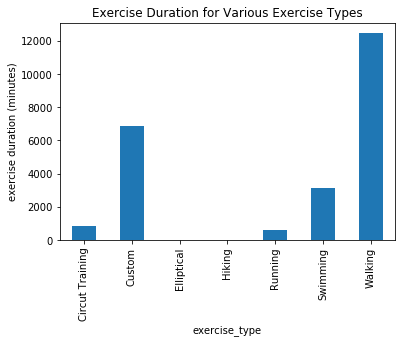

In [12]:
exercise.groupby('exercise_type')['duration'].sum().plot(kind = 'bar')
plt.ylabel('exercise duration (minutes)')
plt.title('Exercise Duration for Various Exercise Types')

The individual enjoys walking, brisk walking, swimming, running and circuit training as their preferred exercise activities.

It appears that most of the individual's exercise time is spent through walking but maybe that definition is too broad. Afterall, it includes regular walking but could also include any walking done for exercise as well. With some research, we set the cut-off between walking and exercise/brisk walking at 3mph or 1.34 m/s. But we also should consider a distance component, 2000 m  seems fair. We can visualize these cut-offs below. The upper-right quadrant is what we define as the brisk-walking for a significant distance. They can be clearly seen to ahve higher calorie burns associated with them as well.

Text(0.5, 1.0, 'Brisk-Walking definition Cut-offs')

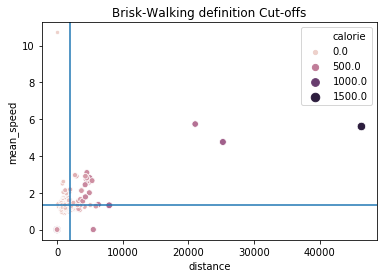

In [13]:
# visualizing cut-offs for distance and mean_speed definition of brisk-walking
sns.scatterplot(data = exercise, x = 'distance', y = 'mean_speed', hue = 'calorie', size = 'calorie')
plt.axvline(2000)
plt.axhline(1.34)
plt.title('Brisk-Walking definition Cut-offs')

In [14]:
#defining walking speed cut-off and separating walking entries into the new categories.
speed_cutoff = 1.34
distance_cutoff = 2000
exercise.loc[(exercise['exercise_type'] == 'Walking') & (exercise['mean_speed'] >= speed_cutoff) & (exercise['distance']>=distance_cutoff), 'exercise_type'] = 'Brisk Walking'

Text(0.5, 1.0, 'Exercise Duration for Various Exercise Types')

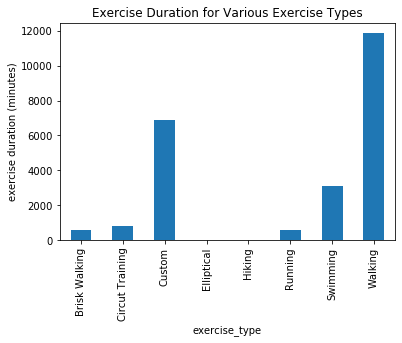

In [15]:
#Replotting
exercise.groupby('exercise_type')['duration'].sum().plot(kind = 'bar')
plt.ylabel('exercise duration (minutes)')
plt.title('Exercise Duration for Various Exercise Types')

That looks better. It appears now that with this definition, brisk walking is actually one of the preferred methods of exercise for this individual. The 'custom' exercise type has no further information as to what it contains but the individual spends quite a significant time performing these custom exercises.

Moving on to the next question. Does the type of exercise change with the day of the week? Let's find out.

Text(0.5, 1.0, 'Daily Exercise Duration for Various Exercise Types (By Day of the Week)')

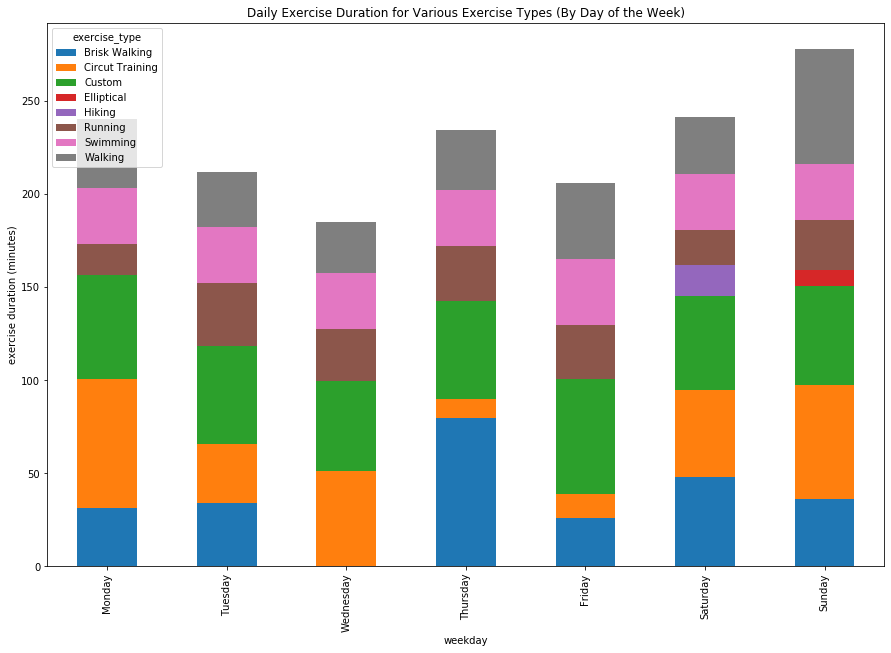

In [16]:
#visualizing exercise activities for every day of the week
exercise.groupby(['date', 'weekday', 'exercise_type'], as_index = False)['duration'].sum().groupby(['weekday', 'exercise_type'])['duration'].median().unstack().plot(kind = 'bar', stacked = True, figsize = (15, 10))
plt.ylabel('exercise duration (minutes)')
plt.title('Daily Exercise Duration for Various Exercise Types (By Day of the Week)')

The individual is active on all days of the week and performs a wide range of exercise on each weekday. We see that the lowest two days for exercise is Wednesday, while the weekend days have the most. 

We also see that running and swimming are done fairly regularly on all days, Thursday is favored for brisk walking, while Monday, Wednesday, Sunday and Saturday for preferred for circuit training. Activities like the elliptical and hiking don't seem to be part of the regular schedule of activites and have very few minutes on saturday and sunday respectively.

Now let's examine how exercise and exercise type vary across different hours of the day

Text(0.5, 1.0, 'Exercise Duration for Various Exercise Types (Weekend By Hour)')

<Figure size 1440x720 with 0 Axes>

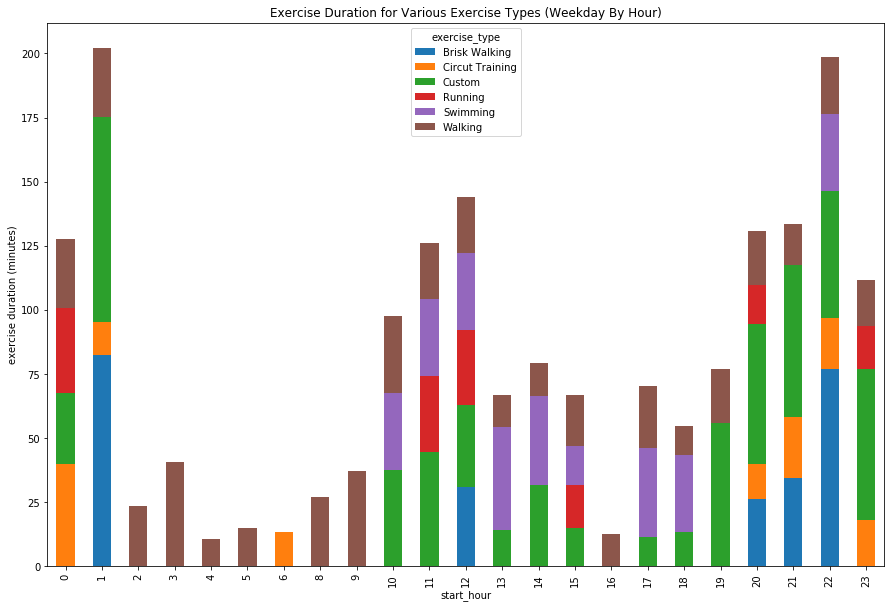

<Figure size 1440x720 with 0 Axes>

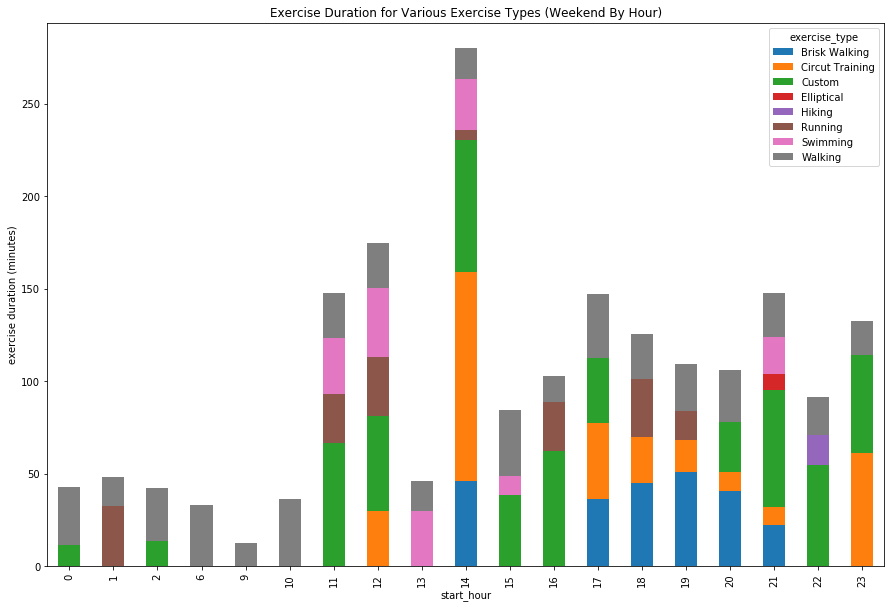

In [17]:
#visualizing exercise activities for times of day
plt.figure(figsize = (20,10))
exercise[exercise['day_type'] == 'weekday'].groupby(['date', 'start_hour', 'exercise_type'], as_index = False)['duration'].sum().groupby(['start_hour', 'exercise_type'])['duration'].median().unstack().plot(kind = 'bar', stacked = True, figsize = (15, 10))
plt.ylabel('exercise duration (minutes)')
plt.title('Exercise Duration for Various Exercise Types (Weekday By Hour)')

plt.figure(figsize = (20,10))
exercise[exercise['day_type'] == 'weekend'].groupby(['date', 'start_hour', 'exercise_type'], as_index = False)['duration'].sum().groupby(['start_hour', 'exercise_type'])['duration'].median().unstack().plot(kind = 'bar', stacked = True, figsize = (15, 10))
plt.ylabel('exercise duration (minutes)')
plt.title('Exercise Duration for Various Exercise Types (Weekend By Hour)')

Above we see the distribution of exercise types across various hours of the day for both weekdays and weekdays.

On weekdays, the individual exercises the most between 11am-12pm as well as in the evening between 8-10pm. The morning window is frequently dedicated towards swimming and running exercise. In the evening window, custom activites, circuit training and brisk walking are done as exercise.

On weekends, the 11am-12pm time window still has the most exercise minutes. Again, the preferred activity in that window is swimming. The evening hours are also dedicated to the custom activities.

On weekends, the preferred time for brisk walking appears to be in the afternoon (2pm) as well as in the evening (5-9pm) which is an earlier window that on weekdays. Peak exercise usually occurs at 2pm, which is later than the 11-12pm window during weekdays. This is probably the due to the restrictions of a work schedule on the weekdays.

Text(0.5, 1.0, 'Daily Exercise Duration for Various Exercise Types (By TimeZone)')

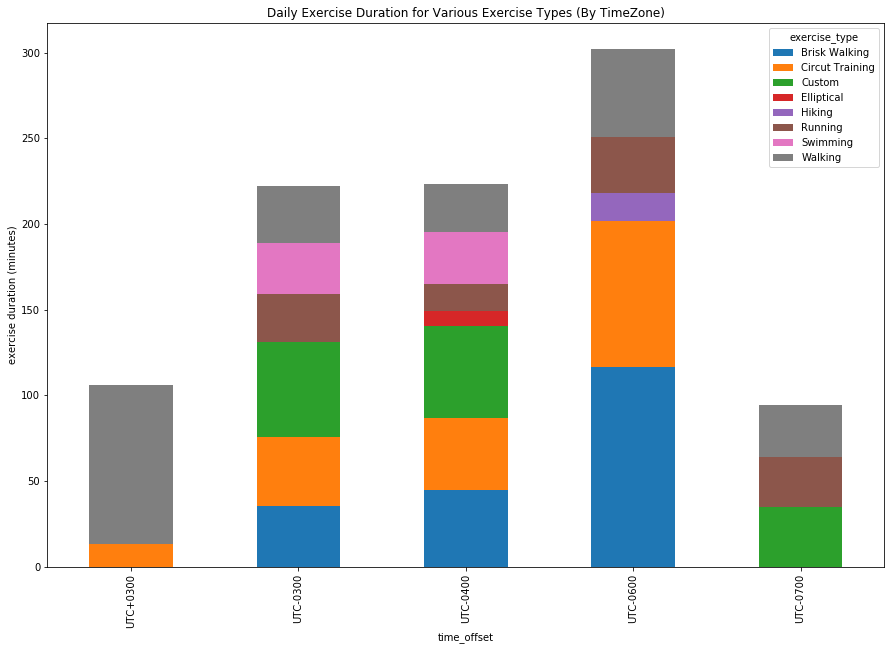

In [18]:
#visualizing exercise activities for every timezone
exercise.groupby(['date', 'time_offset', 'exercise_type'], as_index = False)['duration'].sum().groupby(['time_offset', 'exercise_type'])['duration'].median().unstack().plot(kind = 'bar', stacked = True, figsize = (15, 10))
plt.ylabel('exercise duration (minutes)')
plt.title('Daily Exercise Duration for Various Exercise Types (By TimeZone)')

This is interesting. The least activity occurs in the UTC+0300 and UTC-0700 timezones while the most occurs in the UTC-0600 timezone. 

In the UTC+300 timezone mostly walking is done as exercise with some circuit training. In the UTC-0700 time zone, the exercise is split among walking, running, and custom activities. In the UTC-0600 timezone, brisk walking is the preferred type of exercise, while some time is dedicated to hiking and running. In the UTC-0400 and UTC-0300 timezone, circuit training, custom and brisk walking are the preferred exercise types. 

Swimming, Circuit Training are unique to the UTC-0300 and UTC-0400 timezones. Hiking is unique to the UTC-0600 timezone while the elliptical is unique to the UTC-0400 timezone.

Question: What is the calorie burn-rate for each exercise type?

In [19]:
#defining function to calculate division of two columns
def divide(df, col1, col2):
    return (df[col1]/df[col2]).median()

Text(0.5, 1.0, 'Calorie Burn-Rate for Various Exercise Types')

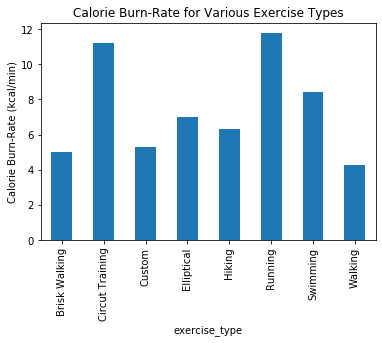

In [20]:
#plotting calorie burn rate for each exercise typr
exercise[exercise['duration']>0].groupby('exercise_type').apply(divide, 'calorie', 'duration').plot(kind = 'bar')
plt.ylabel('Calorie Burn-Rate (kcal/min)')
plt.title('Calorie Burn-Rate for Various Exercise Types')

The individual expends the most calories running, followed by circuit training. Walking is, as expected, the least calorie intensive, with brisk walking slightly higher than that. Brisk-Walking sits between Hiking and regular walking in terms of calorie burn. Swimming is third in the calorie burn-rate, followed by elliptical training and custom activities.

Now let's look at a long-term trend in exercise duration

Text(0.5, 1.0, 'Daily Exercise Duration Across Time')

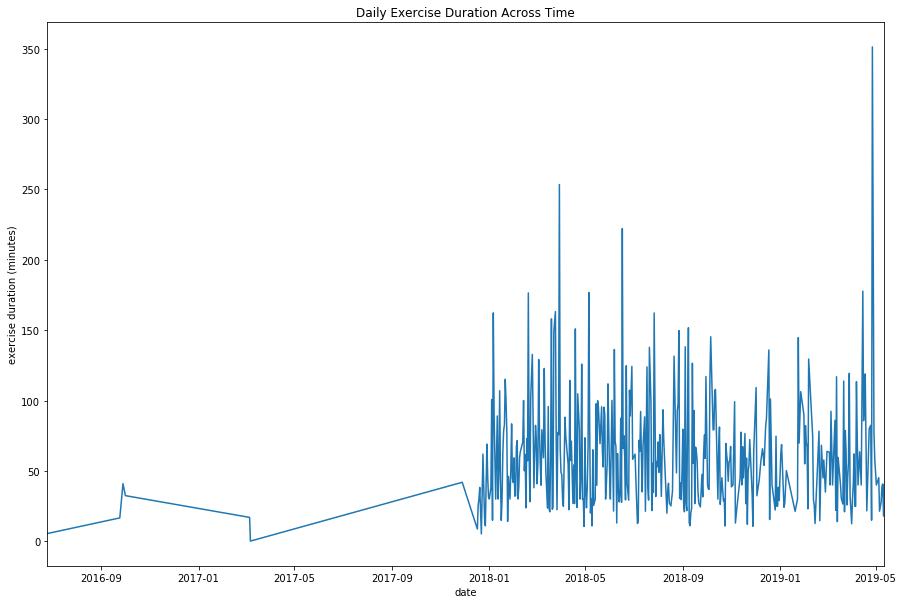

In [21]:
#plotting daily exercise duration over time
plt.figure(figsize = (20, 10))
exercise.groupby('date')['duration'].sum().plot(kind = 'line', stacked = True, figsize = (15, 10))
plt.ylabel('exercise duration (minutes)')
plt.title('Daily Exercise Duration Across Time')

Very few data points were available before January 2018 and then suddenly, there were many records. The exercise duration hovers around 50-75 minutes a day of exercise. It would be interesting to explore why the individual suddenly became active.

### CALORIES

The dataset details metrics dealing with the individuals active and resting calorie burn-rates. Let's take a look.

In [22]:
#getting a preview of the data
calories.head()

,Unnamed: 0,tef_calorie,active_time,pkg_name,update_time,create_time,datauuid,rest_calorie,active_calorie,day_time,deviceuuid
0,0,0.0,5430506,com.sec.android.app.shealth,2019-05-11 10:50:34.030,2019-05-10 11:48:05.846,edbeb878-ad75-4bf2-995f-cff7c19f89d4,1699.8844,473.56952,1557446400000,FN3Qt5ROM0
1,1,0.0,2053212,com.sec.android.app.shealth,2019-05-10 11:51:25.229,2019-05-10 11:48:17.809,d75e0fc1-f033-4484-92b2-7f5851f6e0ae,1770.7876,134.47000,1555545600000,FN3Qt5ROM0
2,2,0.0,3483154,com.sec.android.app.shealth,2019-05-10 11:51:25.404,2019-05-10 11:48:17.871,dd95e9bb-d2d9-4d8d-bc3d-c295bc1488cf,1740.7673,223.66000,1555632000000,FN3Qt5ROM0
3,3,0.0,3630996,com.sec.android.app.shealth,2019-05-10 11:51:25.809,2019-05-10 11:48:18.031,1858ba1b-97ce-4331-8e23-25086963ac2a,1737.6636,230.03998,1555804800000,FN3Qt5ROM0
4,4,0.0,2346862,com.sec.android.app.shealth,2019-05-10 11:51:26.039,2019-05-10 11:48:18.107,3b31eb50-4fad-438e-b5bd-b9a6a7c46a8e,1764.6228,232.24223,1555891200000,FN3Qt5ROM0


In [23]:
#exploring datatypes, null values, number of entries and columns/features
calories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 11 columns):
Unnamed: 0        560 non-null int64
tef_calorie       560 non-null float64
active_time       560 non-null int64
pkg_name          560 non-null object
update_time       560 non-null object
create_time       560 non-null object
datauuid          560 non-null object
rest_calorie      560 non-null float64
active_calorie    560 non-null float64
day_time          560 non-null int64
deviceuuid        560 non-null object
dtypes: float64(3), int64(3), object(5)
memory usage: 48.2+ KB


In [24]:
#summary statistics for the dataset
calories.describe()

,Unnamed: 0,tef_calorie,active_time,rest_calorie,active_calorie,day_time
count,560.000000,560.0,5.600000e+02,560.000000,560.000000,5.600000e+02
mean,279.500000,0.0,6.043166e+06,1689.317439,477.638424,1.533470e+12
std,161.802349,0.0,3.243175e+06,79.301162,268.276707,1.397972e+10
min,0.000000,0.0,0.000000e+00,731.907400,0.000000,1.509322e+12
25%,139.750000,0.0,3.712358e+06,1648.106725,289.900495,1.521396e+12
50%,279.500000,0.0,5.953306e+06,1691.826150,470.543240,1.533470e+12
75%,419.250000,0.0,8.094513e+06,1739.527050,634.702365,1.545545e+12
max,559.000000,0.0,2.032845e+07,1825.247100,1628.029000,1.557619e+12


In [25]:
#dropping all columns with no data/ no useful data
calories = calories.dropna(how = 'all', axis = 1) 
calories = calories.drop(columns = ['Unnamed: 0', 'datauuid', 'pkg_name', 'tef_calorie'])

In [26]:
calories.head()

,active_time,update_time,create_time,rest_calorie,active_calorie,day_time,deviceuuid
0,5430506,2019-05-11 10:50:34.030,2019-05-10 11:48:05.846,1699.8844,473.56952,1557446400000,FN3Qt5ROM0
1,2053212,2019-05-10 11:51:25.229,2019-05-10 11:48:17.809,1770.7876,134.47000,1555545600000,FN3Qt5ROM0
2,3483154,2019-05-10 11:51:25.404,2019-05-10 11:48:17.871,1740.7673,223.66000,1555632000000,FN3Qt5ROM0
3,3630996,2019-05-10 11:51:25.809,2019-05-10 11:48:18.031,1737.6636,230.03998,1555804800000,FN3Qt5ROM0
4,2346862,2019-05-10 11:51:26.039,2019-05-10 11:48:18.107,1764.6228,232.24223,1555891200000,FN3Qt5ROM0


In [27]:
# feature creation using dates
calories['create_time'] = pd.to_datetime(calories['create_time'])
calories['date'] = calories['create_time'].dt.date
calories['weekday'] = pd.Categorical(calories['create_time'].dt.weekday_name, 
                                  categories = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'],
                                  ordered = True)

What are the distributions of active and rest calorie burn-rates?

Text(0.5, 1.0, 'Distribution of Active Calorie Burn')

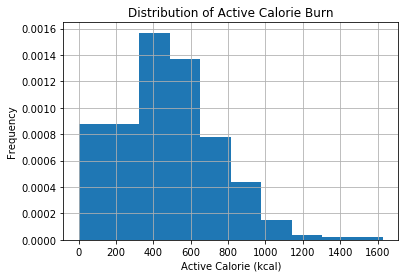

In [28]:
#visualizing active calorie distribution
calories['active_calorie'].hist(density = 'True', bins = 10)
plt.ylabel('Frequency')
plt.xlabel('Active Calorie (kcal)')
plt.title('Distribution of Active Calorie Burn')

The distribution of active calories is right-skewed. The median value is approximately 470 kcal.

Text(0.5, 1.0, 'Distribution of Rest Calorie Burn')

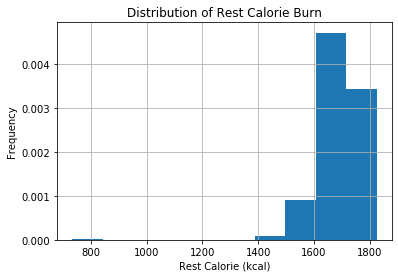

In [29]:
#visualizing rest calorie distribution
calories['rest_calorie'].hist(density = 'True', bins = 10)
plt.ylabel('Frequency')
plt.xlabel('Rest Calorie (kcal)')
plt.title('Distribution of Rest Calorie Burn')

In [30]:
calories.rest_calorie.median()

1691.8261499999999

The distribution of rest calories is left-skewed. The median value is approximately 1692 kcal. There are many equations relating this calorie rate, also known as the basal metabolic rate (BMR) with body weight. 

If we use on of them, then we see that BMR = body_weight(kg) * 24 [1]

This would give us a weight estimate of ~ 70.5 kilograms!

[1] https://www.sciencedirect.com/science/article/pii/B9780323034104500250

What is the distribution across weekday?

Text(0.5, 1.0, 'Distribution of Active Calorie Burn (By Weekday)')

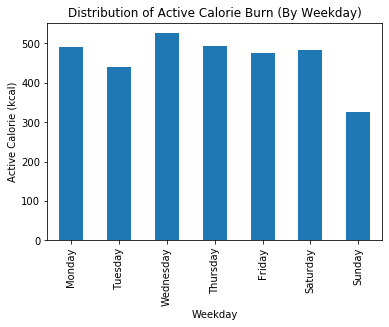

In [31]:
#plotting histogram of active calories by weekday
calories.groupby(['weekday'])['active_calorie'].median().plot(kind = 'bar')
plt.xlabel('Weekday')
plt.ylabel('Active Calorie (kcal)')
plt.title('Distribution of Active Calorie Burn (By Weekday)')

The active calories burn is faily constant for weekdays with the exception of Sunday that sees a significant drop.

Text(0.5, 1.0, 'Distribution of Rest Calorie Burn (By Weekday)')

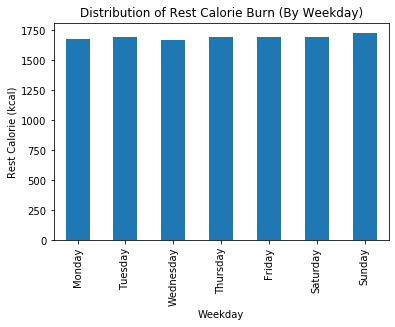

In [32]:
#plotting histogram of rest calories by weekday
calories.groupby(['weekday'])['rest_calorie'].median().plot(kind = 'bar')
plt.xlabel('Weekday')
plt.ylabel('Rest Calorie (kcal)')
plt.title('Distribution of Rest Calorie Burn (By Weekday)')

The rest calorie burn rate is expected to stay the same as is clear in the plot above since the body has a basal metabolic rate that is maintained.

How about any long-term trends?

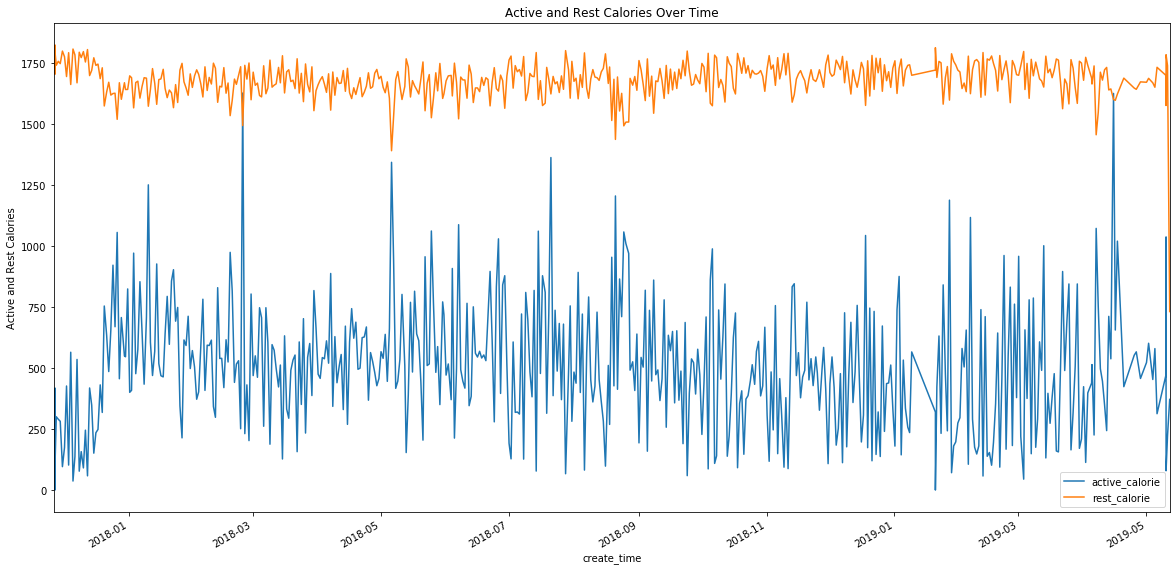

In [33]:
#plotting actuve and rest calories over time
plt.figure(figsize = (20, 10))
calories.groupby(['create_time'])['active_calorie'].median().plot(kind = 'line')
calories.groupby(['create_time'])['rest_calorie'].median().plot(kind = 'line')
plt.ylabel('Active and Rest Calories')
plt.title('Active and Rest Calories Over Time')
plt.legend()

There is an increase in active calories when comparing the time period from before Janaury 2018 and after. This is consistent with what was found in the exercise data. The rest calories saw a small decline in that period. The rest calorie data remains fairly constant around 1650 kcals while the active calories bounce around 600 kcal.

### FLOORS

This dataset contains records of positional data with respect to which floor the individual was on.

In [34]:
#getting preview of data
floors.head()

,Unnamed: 0,start_time,pkg_name,update_time,create_time,time_offset,datauuid,custom,end_time,floor,deviceuuid
0,0,2018-05-02 12:42:15.000,com.sec.android.app.shealth,2018-05-02 12:49:48.489,2018-05-02 12:49:48.475,UTC-0300,e4c884ab-eff3-d1bb-e518-c2aae50809a8,NaN,2018-05-02 12:42:28.000,1.0,F/D7+hL5E5
1,1,2018-05-06 14:20:14.000,com.sec.android.app.shealth,2018-05-06 14:29:13.042,2018-05-06 14:29:13.041,UTC-0300,9c540db5-3893-db29-0395-282bcdad84e0,NaN,2018-05-06 14:20:21.000,1.0,F/D7+hL5E5
2,2,2018-05-02 12:35:06.000,com.sec.android.app.shealth,2018-05-02 12:49:48.456,2018-05-02 12:49:48.456,UTC-0300,f133a106-1db6-cdd1-4236-49f945694d6a,NaN,2018-05-02 12:35:18.000,1.0,F/D7+hL5E5
3,3,2018-04-11 12:12:47.000,com.sec.android.app.shealth,2018-04-11 12:17:26.692,2018-04-11 12:17:26.692,UTC-0300,e400bf12-d0a1-c8d9-022d-6a8ff36e9f32,NaN,2018-04-11 12:13:15.000,1.0,F/D7+hL5E5
4,4,2018-04-26 23:02:45.000,com.sec.android.app.shealth,2018-04-26 23:10:57.723,2018-04-26 23:10:57.722,UTC-0300,9d592d6f-cd60-dd1c-2aed-964fbd7f43f1,NaN,2018-04-26 23:03:13.000,1.0,F/D7+hL5E5


In [35]:
#exploring datatypes, null values, number of entries and features
floors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1518 entries, 0 to 1517
Data columns (total 11 columns):
Unnamed: 0     1518 non-null int64
start_time     1518 non-null object
pkg_name       1518 non-null object
update_time    1518 non-null object
create_time    1518 non-null object
time_offset    1518 non-null object
datauuid       1518 non-null object
custom         0 non-null float64
end_time       1518 non-null object
floor          1518 non-null float64
deviceuuid     1518 non-null object
dtypes: float64(2), int64(1), object(8)
memory usage: 130.6+ KB


In [36]:
#calculating some descriptive statistics of the data
floors.describe()

,Unnamed: 0,custom,floor
count,1518.000000,0.0,1518.000000
mean,758.500000,NaN,2.479578
std,438.353168,NaN,2.858664
min,0.000000,NaN,1.000000
25%,379.250000,NaN,1.000000
50%,758.500000,NaN,1.000000
75%,1137.750000,NaN,2.000000
max,1517.000000,NaN,30.000000


In [37]:
#dropping all columns with no data/ no useful data
floors = floors.dropna(how = 'all', axis = 1) 
floors = floors.drop(columns = ['Unnamed: 0', 'datauuid', 'pkg_name'])

In [38]:
#feature generation using datetime columns
floors['create_time'] = pd.to_datetime(floors['create_time'])
floors['start_time'] = pd.to_datetime(floors['start_time'])
floors['create_hour'] = floors['create_time'].dt.hour
floors['end_time'] = pd.to_datetime(floors['end_time'])
floors['duration'] = (floors['end_time'] - floors['start_time']).dt.total_seconds()/3600
floors['day_type'] = ['weekend' if (x in weekend) else 'weekday' for x in floors['create_time'].dt.weekday_name ]

In [39]:
#removing floors with that are in less than 1% of entries (outliers)
floors = floors[floors['floor'].map(floors['floor'].value_counts(normalize = True))*100 > 1]

What is the distribution of floors across different hours of the day for weekdays and weekends?

Text(0, 0.5, 'Number of Records')

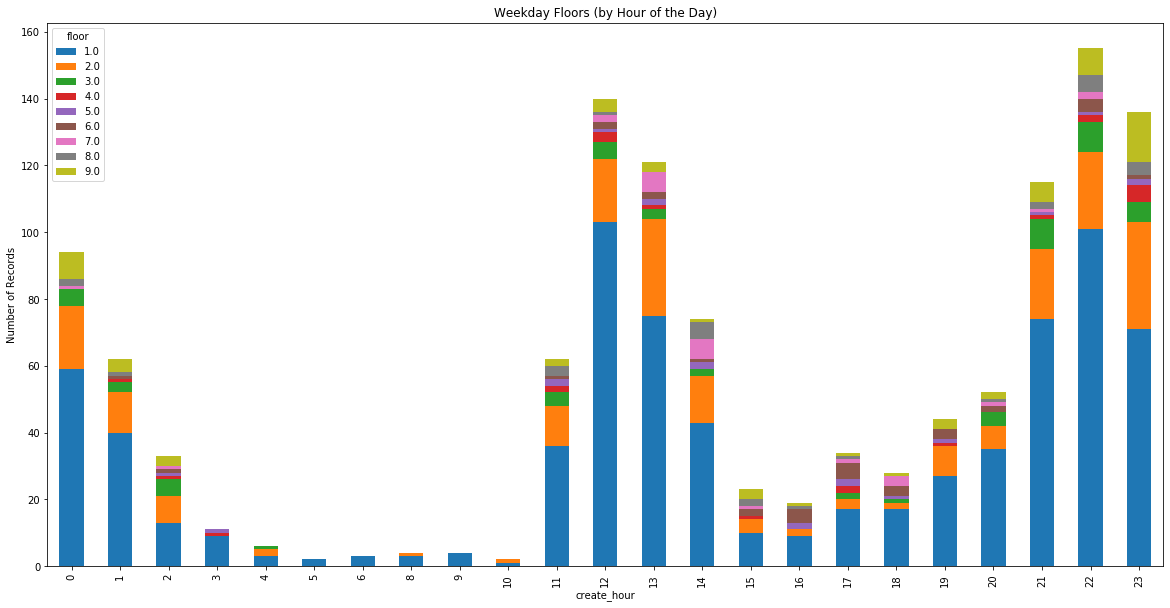

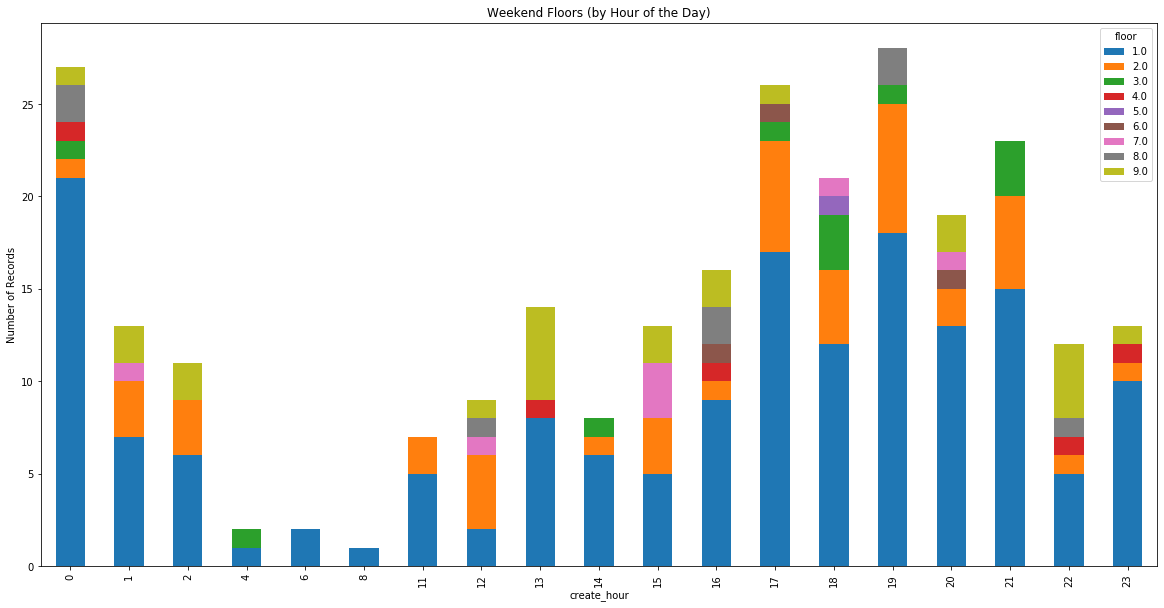

In [40]:
#plotting distribution of record counts of each floor by hour of day for weekdays
floors_weekday = floors[floors['day_type'] == 'weekday'].groupby(['create_hour', 'floor'], as_index = False)['duration'].count()
floors_weekday = floors_weekday.groupby(['create_hour', 'floor'])['duration'].max()
floors_weekday.unstack().plot(kind = 'bar', stacked = True, figsize = (20, 10))
plt.title('Weekday Floors (by Hour of the Day)')
plt.ylabel('Number of Records')

#plotting distribution of record counts of each floor by hour of day for weekends
floors_weekend = floors[floors['day_type'] == 'weekend'].groupby(['create_hour', 'floor'], as_index = False)['duration'].count()
floors_weekend = floors_weekend.groupby(['create_hour', 'floor'])['duration'].max()
floors_weekend.unstack().plot(kind = 'bar', stacked = True, figsize = (20, 10))
plt.title('Weekend Floors (by Hour of the Day)')
plt.ylabel('Number of Records')

The individual has the most records on the first floor, followed by the second floor and then the ninth floor.

For weekdays and weekends, the number of records of floors drops between 3-10 am. The most frequent floor changes occur between 11-12 pm and well as from 9pm to 1 am on weekday. For weekends, these floor changes occur mostly between 5pm and 9pm as well as 12 am.

### HEART RATE

This dataset contains measurements of the individuals heart rate.

In [41]:
#Getting preview of data
heart_rate.head()

,Unnamed: 0,create_time,time_offset,max,heart_beat_count,custom,end_time,heart_rate,deviceuuid,start_time,pkg_name,update_time,min,binning_data,datauuid,comment
0,0,2018-05-23 02:35:00.243,UTC-0300,0.0,1,NaN,2018-05-23 02:20:29.321,54.0,F/D7+hL5E5,2018-05-23 02:20:29.321,com.sec.android.app.shealth,2018-05-23 02:35:00.243,0.0,NaN,edde1772-6091-958d-9868-d2816abd647e,NaN
1,1,2017-12-16 07:35:00.256,UTC-0400,0.0,1,NaN,2017-12-16 07:30:29.453,63.0,F/D7+hL5E5,2017-12-16 07:30:29.453,com.sec.android.app.shealth,2017-12-16 07:35:00.256,0.0,NaN,3550426a-158e-304e-260a-c75b3773d484,NaN
2,2,2018-01-28 01:35:01.272,UTC-0400,0.0,1,NaN,2018-01-28 01:30:29.317,61.0,F/D7+hL5E5,2018-01-28 01:30:29.317,com.sec.android.app.shealth,2018-01-28 01:35:01.272,0.0,NaN,facc101b-1f38-9ea7-85bf-0144bf1d5f60,NaN
3,3,2018-05-23 01:15:00.254,UTC-0300,0.0,1,NaN,2018-05-23 01:10:48.888,73.0,F/D7+hL5E5,2018-05-23 01:10:48.888,com.sec.android.app.shealth,2018-05-23 01:15:00.254,0.0,NaN,b1dc8b7c-6d5c-4275-4a74-42d336b8bb31,NaN
4,4,2018-03-30 15:37:13.190,UTC-0300,0.0,1,NaN,2018-03-30 15:37:13.005,63.0,F/D7+hL5E5,2018-03-30 15:37:13.005,com.sec.android.app.shealth,2018-03-30 15:37:16.626,0.0,NaN,6566762c-543e-05af-16d0-ee56fc0e5358,NaN


In [42]:
#exploring datatypes, null values, number of entries and columns/features
heart_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24278 entries, 0 to 24277
Data columns (total 16 columns):
Unnamed: 0          24278 non-null int64
create_time         24278 non-null object
time_offset         24278 non-null object
max                 24261 non-null float64
heart_beat_count    24278 non-null int64
custom              0 non-null float64
end_time            24278 non-null object
heart_rate          24278 non-null float64
deviceuuid          24278 non-null object
start_time          24278 non-null object
pkg_name            24278 non-null object
update_time         24278 non-null object
min                 24261 non-null float64
binning_data        46 non-null object
datauuid            24278 non-null object
comment             0 non-null float64
dtypes: float64(5), int64(2), object(9)
memory usage: 3.0+ MB


In [43]:
#computing descriptive statistics on the data
heart_rate.describe()

,Unnamed: 0,max,heart_beat_count,custom,heart_rate,min,comment
count,24278.000000,24261.000000,24278.000000,0.0,24278.000000,24261.000000,0.0
mean,12138.500000,0.519888,0.993286,NaN,60.735687,0.517250,NaN
std,7008.599254,5.906044,0.081665,NaN,8.486201,5.876406,NaN
min,0.000000,0.000000,0.000000,NaN,41.000000,0.000000,NaN
25%,6069.250000,0.000000,1.000000,NaN,55.000000,0.000000,NaN
50%,12138.500000,0.000000,1.000000,NaN,59.000000,0.000000,NaN
75%,18207.750000,0.000000,1.000000,NaN,65.000000,0.000000,NaN
max,24277.000000,118.000000,1.000000,NaN,177.000000,118.000000,NaN


In [44]:
#dropping all columns with no data/ no useful data
heart_rate = heart_rate.dropna(how = 'all', axis = 1) 
heart_rate = heart_rate.drop(columns = ['Unnamed: 0', 'datauuid', 'pkg_name', 'binning_data'])

In [45]:
#feature generation using datetime features
heart_rate['create_time'] = pd.to_datetime(heart_rate['create_time'])
heart_rate['date'] = heart_rate['create_time'].dt.date

In [46]:
heart_rate.head()

,create_time,time_offset,max,heart_beat_count,end_time,heart_rate,deviceuuid,start_time,update_time,min,date
0,2018-05-23 02:35:00.243,UTC-0300,0.0,1,2018-05-23 02:20:29.321,54.0,F/D7+hL5E5,2018-05-23 02:20:29.321,2018-05-23 02:35:00.243,0.0,2018-05-23
1,2017-12-16 07:35:00.256,UTC-0400,0.0,1,2017-12-16 07:30:29.453,63.0,F/D7+hL5E5,2017-12-16 07:30:29.453,2017-12-16 07:35:00.256,0.0,2017-12-16
2,2018-01-28 01:35:01.272,UTC-0400,0.0,1,2018-01-28 01:30:29.317,61.0,F/D7+hL5E5,2018-01-28 01:30:29.317,2018-01-28 01:35:01.272,0.0,2018-01-28
3,2018-05-23 01:15:00.254,UTC-0300,0.0,1,2018-05-23 01:10:48.888,73.0,F/D7+hL5E5,2018-05-23 01:10:48.888,2018-05-23 01:15:00.254,0.0,2018-05-23
4,2018-03-30 15:37:13.190,UTC-0300,0.0,1,2018-03-30 15:37:13.005,63.0,F/D7+hL5E5,2018-03-30 15:37:13.005,2018-03-30 15:37:16.626,0.0,2018-03-30


Question: What is the distribution of heart rates (bpm)?

Text(0.5, 1.0, 'Frequency of Different Heart Rates')

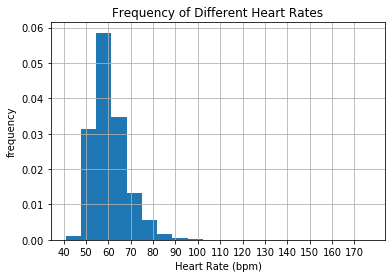

In [47]:
# Plotting histogram of heart rates
heart_rate['heart_rate'].hist(density = True, bins = 20)
plt.xticks(np.arange(40, 180, 10))
plt.xlabel("Heart Rate (bpm)")
plt.ylabel('frequency')
plt.title("Frequency of Different Heart Rates")

The maximum heart rate of the individual reaches 180 bpm. The normal heart rate is in the 60-100 bpm at rest. A quick Google search reveal that this would put the individual between 35-40 years old by the characterization of the American Heart Rate Association, an interesting piece of information. Furthermore the most common heart rate for this individual is between 50-60. The estimate is that 40-60 is the range for a typically athletic person. Giving us a further insight about this individual. It would make sense with the amount of different exercises they are involved in.

www.medicalnewstoday.com/articles/235710.ph

What is the long-term heart_rate trend?

Text(0.5, 0, 'Date')

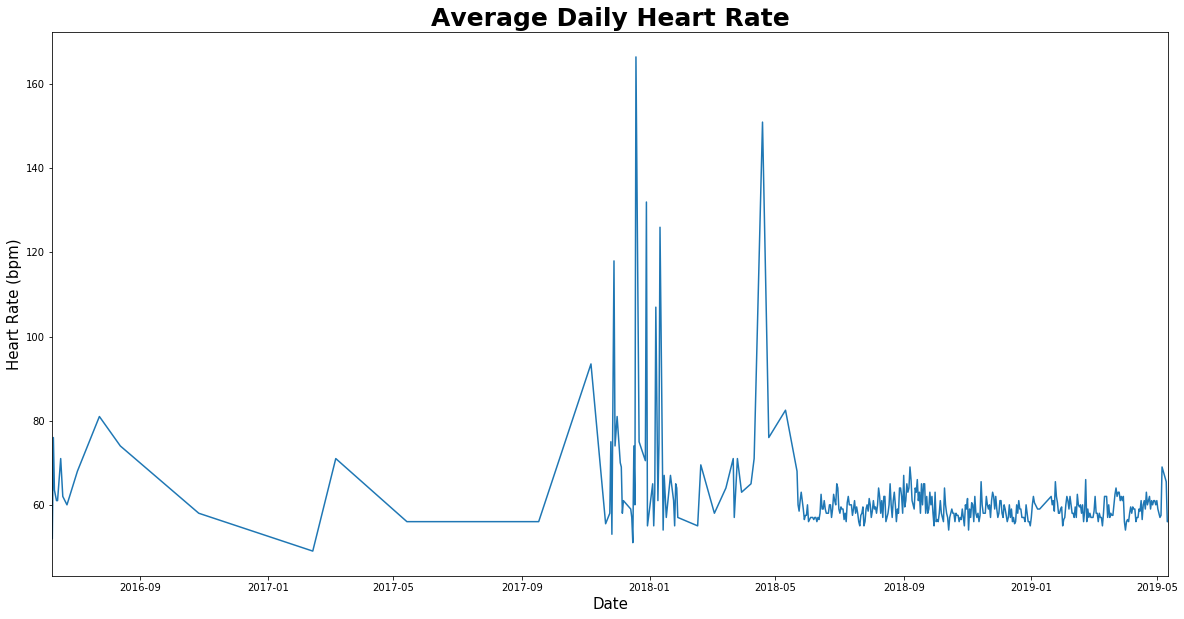

In [48]:
#plotting Heart rate over time
plt.figure(figsize = (20, 10))
heart_rate.groupby(['date'])['heart_rate'].median().plot(kind = 'line')
plt.title("Average Daily Heart Rate", fontsize = 25, fontweight = 'bold')
plt.ylabel("Heart Rate (bpm)", fontsize = 15)
plt.xlabel("Date", fontsize = 15)

Heart rate readings have become more frequent as of Jaunary 2018, in a manner similar to other datasets. There was a period of initial shock ot the heart rate measurements until February 2018, then a drop back to normal before another shock at May and then back to normal ever since. These periods of shock could be from a lifestyle change or periods of extreme stress.

### SLEEP

This dataset deals with metrics related to rest and sleep for the individual.

In [49]:
#getting preview of data
sleep.head()

,Unnamed: 0,com.samsung.health.sleep.datauuid,efficiency,original_efficiency,original_bed_time,has_sleep_data,com.samsung.health.sleep.pkg_name,com.samsung.health.sleep.create_time,com.samsung.health.sleep.time_offset,com.samsung.health.sleep.end_time,com.samsung.health.sleep.custom,original_wake_up_time,quality,com.samsung.health.sleep.deviceuuid,extra_data,com.samsung.health.sleep.start_time,com.samsung.health.sleep.update_time,com.samsung.health.sleep.comment
0,0,5ae9435a-9184-9741-ecc9-d30f2855ea09,86.653770,NaN,NaN,1.0,com.sec.android.app.shealth,1535884958245,UTC-0300,1535884920000,NaN,NaN,NaN,F/D7+hL5E5,NaN,1535853900000,1535884958245,NaN
1,1,e4f5dec4-b492-88b8-f89f-a30bffc7c8dc,92.362770,NaN,NaN,1.0,com.sec.android.app.shealth,1543754177370,UTC-0400,1543754040000,NaN,NaN,NaN,F/D7+hL5E5,NaN,1543728960000,1543754177370,NaN
2,2,d5712eb4-d002-3f81-1594-a9d6e8b6a0d0,70.967740,NaN,NaN,1.0,com.sec.android.app.shealth,1530743930297,UTC-0300,1530743040000,NaN,NaN,NaN,F/D7+hL5E5,NaN,1530739380000,1530743930297,NaN
3,3,440a44c6-a8ee-ecd9-8f96-7b62429d46e9,93.589745,NaN,NaN,1.0,com.sec.android.app.shealth,1539772714989,UTC-0300,1539772620000,NaN,NaN,NaN,F/D7+hL5E5,NaN,1539739920000,1539772714989,NaN
4,4,604fa367-bfab-801d-db26-b75b21a92c61,91.623040,NaN,NaN,1.0,com.sec.android.app.shealth,1525253471680,UTC-0300,1525253400000,NaN,NaN,NaN,F/D7+hL5E5,NaN,1525230540000,1525253471680,NaN


In [50]:
#exploring datatypes, null values, number of entries and columns
sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 662 entries, 0 to 661
Data columns (total 18 columns):
Unnamed: 0                              662 non-null int64
com.samsung.health.sleep.datauuid       662 non-null object
efficiency                              662 non-null float64
original_efficiency                     36 non-null float64
original_bed_time                       36 non-null object
has_sleep_data                          652 non-null float64
com.samsung.health.sleep.pkg_name       662 non-null object
com.samsung.health.sleep.create_time    662 non-null int64
com.samsung.health.sleep.time_offset    662 non-null object
com.samsung.health.sleep.end_time       662 non-null int64
com.samsung.health.sleep.custom         0 non-null float64
original_wake_up_time                   36 non-null object
quality                                 46 non-null float64
com.samsung.health.sleep.deviceuuid     662 non-null object
extra_data                              141 non-null object

In [51]:
#computing descriptive statisitics 
sleep.describe()

,Unnamed: 0,efficiency,original_efficiency,has_sleep_data,com.samsung.health.sleep.create_time,com.samsung.health.sleep.end_time,com.samsung.health.sleep.custom,quality,com.samsung.health.sleep.start_time,com.samsung.health.sleep.update_time,com.samsung.health.sleep.comment
count,662.000000,662.000000,36.000000,652.0,6.620000e+02,6.620000e+02,0.0,46.000000,6.620000e+02,6.620000e+02,0.0
mean,330.500000,87.061086,93.029683,1.0,1.535867e+12,1.535866e+12,NaN,41306.978261,1.535845e+12,1.535868e+12,NaN
std,191.247222,15.787412,2.387901,0.0,1.229433e+10,1.229434e+10,NaN,19162.372604,1.229397e+10,1.229366e+10,NaN
min,0.000000,0.000000,85.714290,1.0,1.513426e+12,1.513425e+12,NaN,0.000000,1.513401e+12,1.513426e+12,NaN
25%,165.250000,88.000000,92.303657,1.0,1.525700e+12,1.525616e+12,NaN,50002.000000,1.525601e+12,1.525700e+12,NaN
50%,330.500000,90.680165,93.088888,1.0,1.535862e+12,1.535862e+12,NaN,50003.000000,1.535844e+12,1.535862e+12,NaN
75%,495.750000,92.776808,94.552854,1.0,1.546241e+12,1.546240e+12,NaN,50004.000000,1.546214e+12,1.546241e+12,NaN
max,661.000000,97.391304,96.572580,1.0,1.557658e+12,1.557657e+12,NaN,50005.000000,1.557626e+12,1.557658e+12,NaN


In [52]:
#removing prefix from columns
sleep.columns = [x.split('.')[-1] for x in sleep.columns]

In [53]:
#dropping all columns with no data/ no useful data
sleep = sleep.dropna(how = 'all', axis = 1) 
sleep = sleep.drop(columns = ['Unnamed: 0', 'datauuid', 'pkg_name', 'extra_data'])

In [54]:
sleep.head()

,efficiency,original_efficiency,original_bed_time,has_sleep_data,create_time,time_offset,end_time,original_wake_up_time,quality,deviceuuid,start_time,update_time
0,86.653770,NaN,NaN,1.0,1535884958245,UTC-0300,1535884920000,NaN,NaN,F/D7+hL5E5,1535853900000,1535884958245
1,92.362770,NaN,NaN,1.0,1543754177370,UTC-0400,1543754040000,NaN,NaN,F/D7+hL5E5,1543728960000,1543754177370
2,70.967740,NaN,NaN,1.0,1530743930297,UTC-0300,1530743040000,NaN,NaN,F/D7+hL5E5,1530739380000,1530743930297
3,93.589745,NaN,NaN,1.0,1539772714989,UTC-0300,1539772620000,NaN,NaN,F/D7+hL5E5,1539739920000,1539772714989
4,91.623040,NaN,NaN,1.0,1525253471680,UTC-0300,1525253400000,NaN,NaN,F/D7+hL5E5,1525230540000,1525253471680


In [55]:
# function to retrieve local times
def local_time(time, zone):
    z = zone[3:]
    operator = z[0]
    hour = z[1:3]
    minute = z[3:]
    dt = time + timedelta(hours = int(operator + hour)) + timedelta(minutes = int(operator + minute))
    return dt

In [56]:
# converting datetime columns from time stamp to utc
sleep['create_time_utc'] = (sleep['create_time']/1000).apply(datetime.utcfromtimestamp)
sleep['start_time_utc'] = (sleep['start_time']/1000).apply(datetime.utcfromtimestamp)
sleep['end_time_utc'] = (sleep['end_time']/1000).apply(datetime.utcfromtimestamp)

In [57]:
#applying time zone and daylight savingtime changes on all date columns
sleep['create_time'] = sleep.apply(lambda row: local_time(row['create_time_utc'], row['time_offset']), axis=1)
sleep['start_time'] = sleep.apply(lambda row: local_time(row['start_time_utc'], row['time_offset']), axis=1)
sleep['end_time'] = sleep.apply(lambda row: local_time(row['end_time_utc'], row['time_offset']), axis=1)

In [58]:
#creating columns that contain hourly information 
sleep['start_hour'] = sleep['start_time'].dt.hour
sleep['end_hour'] = sleep['end_time'].dt.hour
#creating a day of the week and weekday/weekend label for each date as additional groupings
sleep['weekday'] = pd.Categorical(sleep['create_time'].dt.weekday_name, 
                                  categories = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'],
                                  ordered = True)
sleep['day_label'] =  ['weekend' if (x in weekend) else 'weekday' for x in sleep['create_time'].dt.weekday_name ]

In [59]:
sleep['date'] = sleep['create_time'].dt.date

In [60]:
#calculating duration of sleep using difference between start and end time
sleep['duration'] = (sleep['end_time_utc'] - sleep['start_time_utc']).dt.total_seconds()/3600

To start off, let's find out what the time zones represent by answering a simple question: How many entries (rows) correspond to each time zone? Let's look at the chart by weeks of the year to get a general idea.

Text(0, 0.5, 'Count')

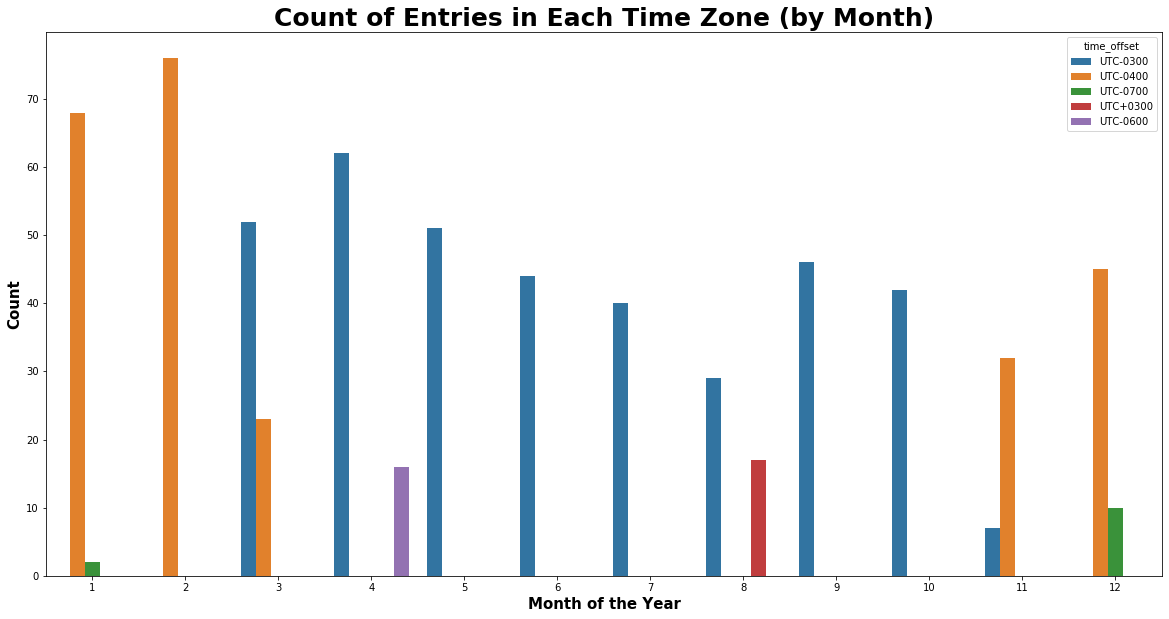

In [61]:
#plotting count of entries in each time zone
plt.figure(figsize = (20, 10))
sns.countplot(x = sleep['create_time'].dt.month, hue = sleep['time_offset'])
plt.title('Count of Entries in Each Time Zone (by Month)', fontsize = 25, fontweight = 'bold')
plt.xlabel('Month of the Year', fontsize = 15, fontweight = 'bold')
plt.ylabel("Count", fontsize = 15, fontweight = 'bold')

From the chart above we see that the time zone 'UTC-0400' lasts from November (Week 50) to March (Week 10). Then the timezone switches to 'UTC-0300' until November of the following year. This time switch is by an hour between the two. As such, this change from 'UTC-0400' to 'UTC-0300' probably represents a daylight savings time change. These typically occur in March and November. These two time zones are the most frequent. However, the individual also has entries for 3 other time zones. This occurs every 4 months. 'UTC-0700' and 'UTC-0600' and by the same train of thought as the previous two timezones, occur in the appropriate months for them to be be a daylight savings time change of the same zone. They occur in November and April respectively. Finally, the "UTC+0300" time zone, occurs in August and is pretty far from the other zones. 

We can thus deduce that the individual resides in the UTC-0300/UTC-0400 time zone and makes three trips a year to a different time zone. They are spaced 4 months apart (April, August, December). The spring and winter trips are daylight changes of the same timezone while the summer trip is a different location altogether.

Now let's tackle another question. When does this person usually go to bed? How this change across time zones and between weekends and weekdays?

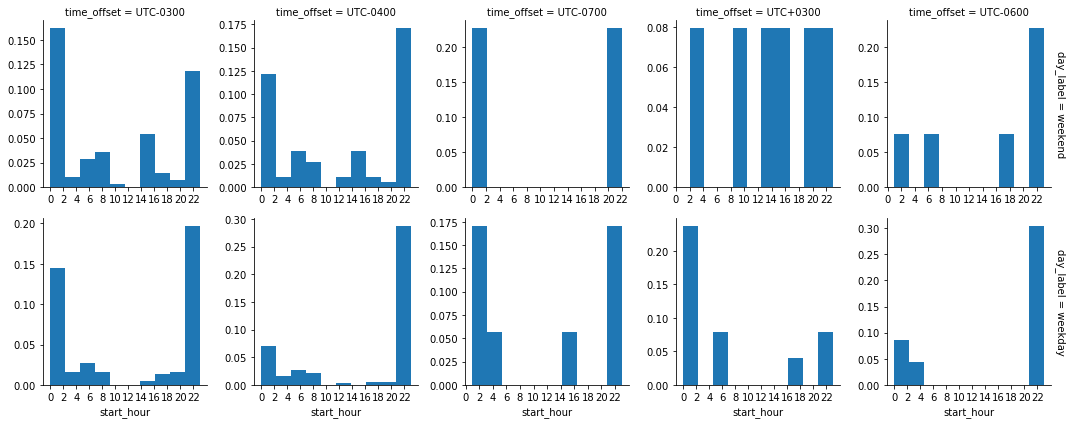

In [62]:
#plotting grid of sleep start hour for each time zone across weekdays and weekends
fig = sns.FacetGrid(sleep,  col = "time_offset", row = 'day_label', sharey = False, sharex = False, margin_titles = True)
fig = fig.map(plt.hist, 'start_hour', density = True)
fig.set(xticks = np.arange(0, 24, 2))

The rows above represent the labels (Weekday and Weekend) whereas the columns each correspond to the time zone indicated.

For "UTC-0300", we see that the most common sleep times range from 9 pm (21:00) to 2 am (02:00). In "UTC-0400" is when the clocks are turned back (winter time). This is characterized by shorter days and longer nights. Here, we see that the person's sleep times are shifted earlier than the "UTC-0300", with 9pm (21:00) to 11 pm (23:00) being the most common sleep times. This makes sense since the days are shorter.

Comparing weekdays to weekends for those two time zones, we see that the weekends contain more sleep periods during the day time. These could very well correspond to naps taken by the individual. For weekdays it is strange to see some sleep periods start at 8 or 9 am. Although not frequently occuring, these could be instances when the individual woke and decided to sleep in a little bit. We have no indication of the work schedule for them. A guess could be somewhere between 9 am and 4 pm as these are the two periods during weekdays that contain no sleep start instances and that what a typical work day schedule is. The data could be representative of a long sleep broken down into several sleep instances. The individual could wake up several times during the night and each time they fall back a sleep, a seperate instance would be recorded. On the weekends we see, more sleep instances during that 9-4 window, indicating possible naps during that free time.

Looking at the next time zone, during the trip "UTC-0700". We see that that the sleep scedhule is a lot more well defined. The most time to go to bed during weekdays is between 9 pm and 2 am while sometimes going as late as 3-5 am. The individual takes naps between 2-4 pm. During weekends the individual goes to bed between 10 pm and 2 am. The daylight time change for this zone, UTC-0600' is distributed similarly but with more frequency in sleeping earlier on weekdays. The weekends have many sleep instances throughout the day.

Finally the UTC+0300 time zone contains many sleep instances for many times throughout the day on both weekdays and weekends. This could be very much due to jet lag since this is the furthest time zone.

Now let's look at wake up time (end time) distributions

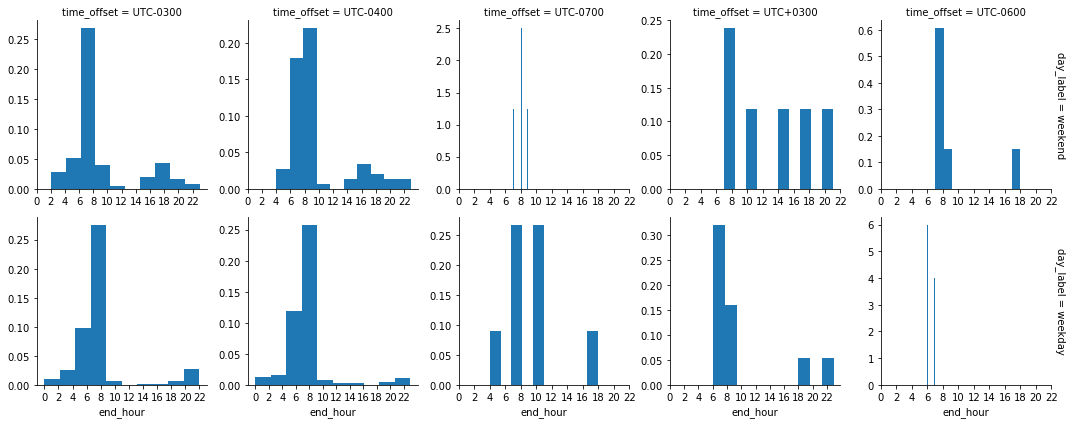

In [63]:
#plooting grid of histograms for sleep end hour for each time zone across weekdays and weekends
fig = sns.FacetGrid(sleep,  col = "time_offset", row = 'day_label', sharey = False, sharex = False, margin_titles = True)
fig = fig.map(plt.hist, 'end_hour', density = True)
fig.set(xticks = np.arange(0, 24, 2))

A similar conclusion can be made to the sleep time plots. There is a window in the weekday plots for both "UTC-0300" and "UTC-0400" in which there is no sleep. Roughly between 9-5 pm. This in inferred to be the working schedule of the individual. The weekends also contain some later wake up times that the weekdays and this makes sense as the weekends have no work, allowing someone to sleep in. The weekday wake up times are most commonly between 7-8 am. While on the weekends they are between 8-9 am in the winter (UTC-0400) and between 7-8 in the summer (UTC-0300).

In the three timezones corresponding to trips, we see frequent wake up times through out the day, indicating many sleep instances. This could be, as was mentioned earlier a result of jet lag.

Next let's look at how sleep durations are distributed.

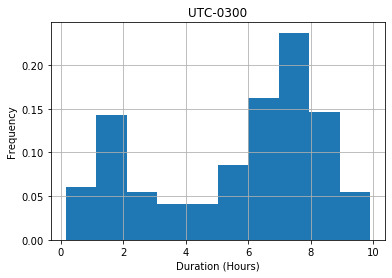

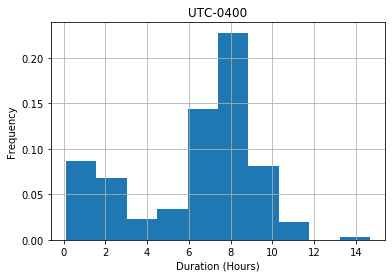

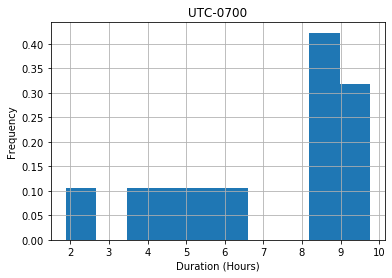

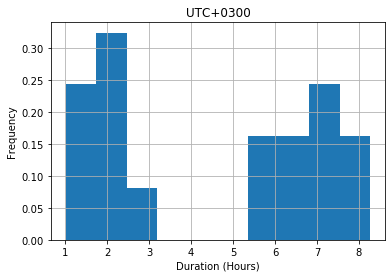

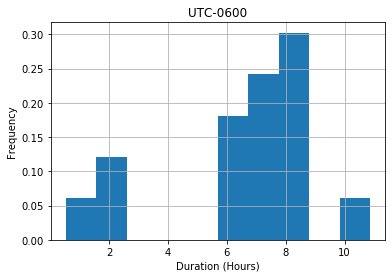

In [64]:
#plotting histograms for sleep duration across different time zones
offsets = sleep['time_offset'].unique()
for element in offsets:
    plt.figure()
    plt.title(element)
    plt.xlabel('Duration (Hours)')
    plt.ylabel('Frequency')
    sleep[sleep['time_offset'] == element]['duration'].hist(density = True)

The most commmon sleep for the individual is between 7-8 hours for the "UTC-0400" and "UTC-0300" time zones. The latter though contains more sleep instances of shorter duration, particularly between 1-2 hours and 3-4 hours. The majority of the sleep in the "UTC-0700" is in the 8-10 hour range. The summer "UTC-0600" daylight savings shift of that timezone has a similar distribution of durations but is slightly shifted to lower values. The spring-fall period seems to have less sleep hours in general that than the fall-spring period in the UTC-0700 and UTC-600 timezones. Finally, the UTC+0300 time zone has either short sleep (1-3 hours) or long sleep durations (5.5-8 hours) with none in between.

Next question: What days of the week does the individual sleep most?

Text(0, 0.5, 'Sleep Duration (Hours)')

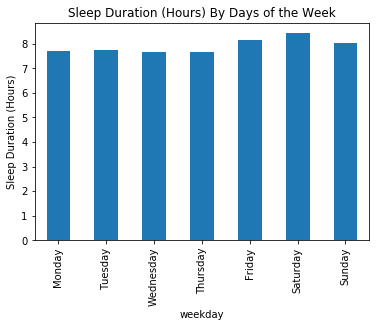

In [65]:
#plotting bar plot for duration of sleep across weekdays
sleep.groupby(['date', 'weekday'], as_index = False)['duration'].sum().groupby(['weekday'])['duration'].median().plot(kind = 'bar')
plt.title('Sleep Duration (Hours) By Days of the Week')
plt.ylabel('Sleep Duration (Hours)')

In [66]:
sleep.groupby(['date', 'weekday'], as_index = False)['duration'].sum().groupby(['weekday'])['duration'].median()

weekday
Monday       7.716667
Tuesday      7.733333
Wednesday    7.641667
Thursday     7.650000
Friday       8.150000
Saturday     8.425000
Sunday       8.033333
Name: duration, dtype: float64

In the plot above, we visualize the total hours each day of the week that the individual is alseep. From the weekdays, Sunday, then Friday, then Saturday are the most days that the individual spends sleeping, whereas Thursday is the least. The weekdays have fairly constant sleep durations. The sleep schedule is between 7-8 hours every day which is well within the recommended range. This individual seems like they have a consistent sleep demand.

Question: How does sleep compare between weekdays and weekends in general?

Text(0, 0.5, 'Sleep Duration (Hours)')

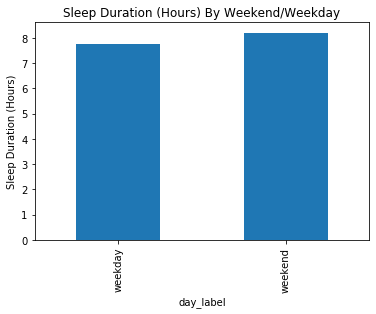

In [67]:
#creating bar plot for weekday/weekend sleep durations
sleep.groupby(['date', 'day_label'], as_index = False)['duration'].sum().groupby(['day_label'])['duration'].median().plot(kind = 'bar')
plt.title('Sleep Duration (Hours) By Weekend/Weekday')
plt.ylabel('Sleep Duration (Hours)')

In [68]:
sleep.groupby(['date', 'day_label'])['duration'].sum().groupby(['day_label']).median()

day_label
weekday    7.766667
weekend    8.200000
Name: duration, dtype: float64

The difference is about 0.40 hours or rather 24 minutes more on average that the individual spends sleeping more on weekends that weekdays. This is expected as on weekends, scheduled work commitments occur less than weekdays. The difference is quite small though. Overall, it is also close to the recommended 7-8 hours of sleep. 

Question: How does sleep efficiency vary across the different days of the week and across timezones?

Text(0.5, 1.0, 'Data Spread of Sleep Efficiencies by Days of the Week and Time Zones')

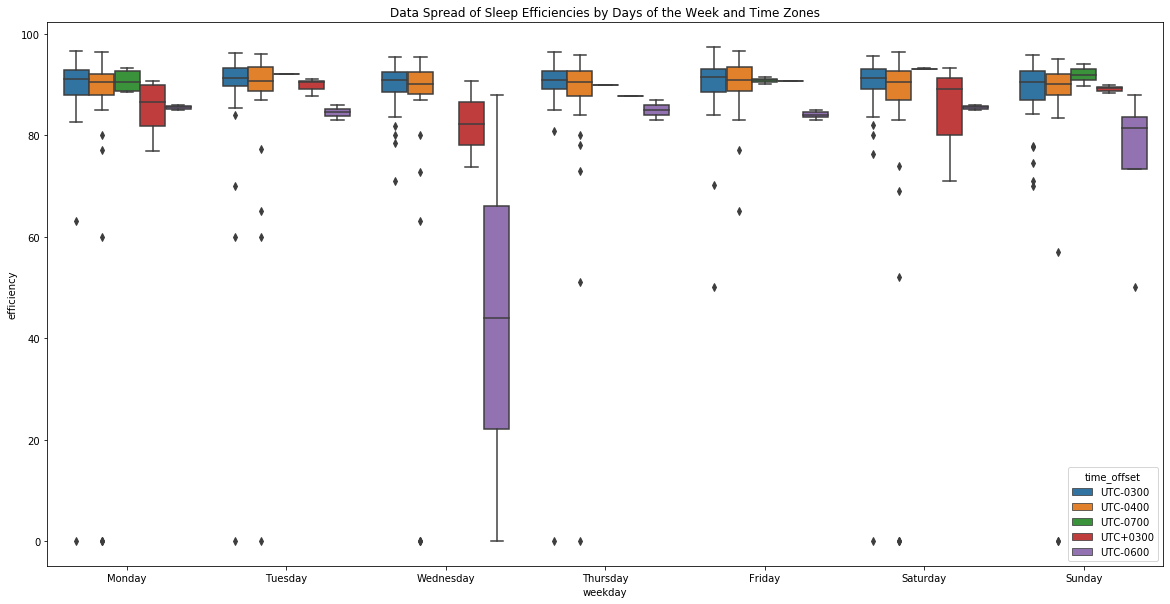

In [69]:
#creating boxplot of sleep efficiencies for different days of the week across timezones
plt.figure(figsize = (20,10))
sns.boxplot(sleep['weekday'], sleep['efficiency'], hue = sleep['time_offset'])
plt.title('Data Spread of Sleep Efficiencies by Days of the Week and Time Zones')

This metric corresponds to how much of the time in bed is actually spent sleeping. It is interesting to note that when this individual travels in the winter (UTC -0700) their sleep efficiency generally has the least spread among all other times. This is right around the holiday times so that could be an explanation. The trups in the summer and spring have generally the highest spread among all the data points. These could have the influence of work stress on the individual. Between weekdays the sleep efficiency stays pretty contstant.

Question: Does the timing of going to sleep have any effect on sleep efficiency?

Text(0.5, 1.0, 'Data Spread of Sleep Efficiencies by Time of Day')

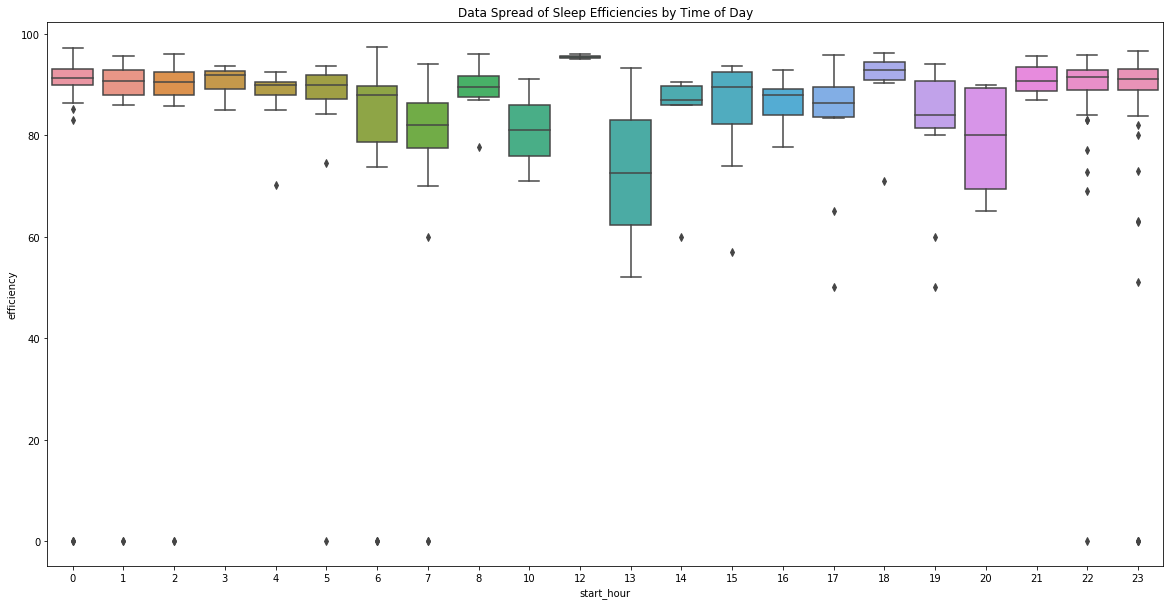

In [70]:
#creating boxplot of durations for various sleep hours
plt.figure(figsize = (20,10))
sns.boxplot(sleep['start_hour'], sleep['efficiency'])
plt.title('Data Spread of Sleep Efficiencies by Time of Day')

It is clear that any sleep at 1 pm produces very mixed results with either high or very low efficiencies. It is interesting to see that any sleep that occurs during the habitual sleep schedule is the most efficient while any sleep outside of the habitual schedule (6am-8am) is the least efficient.

How does sleep duration impact efficiency?

Text(0.5, 1.0, 'Sleep Duration vs Efficiency (By TimeZone)')

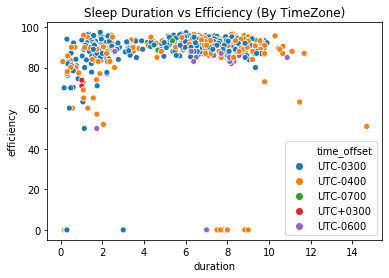

In [71]:
#creating scatteprlot of sleep duration versus efficiency for different timezones
sns.scatterplot(data = sleep, x = 'duration', y = 'efficiency', hue = 'time_offset')
plt.title('Sleep Duration vs Efficiency (By TimeZone)')

Generally, as sleep duration approaches smaller values (<3 hours) and larger values(9+ hours), we can see the sleep efficiency drop. The most efficient sleep occurs between (4-8) hours for this individual.

Finally let's explore the long terms sleep trend

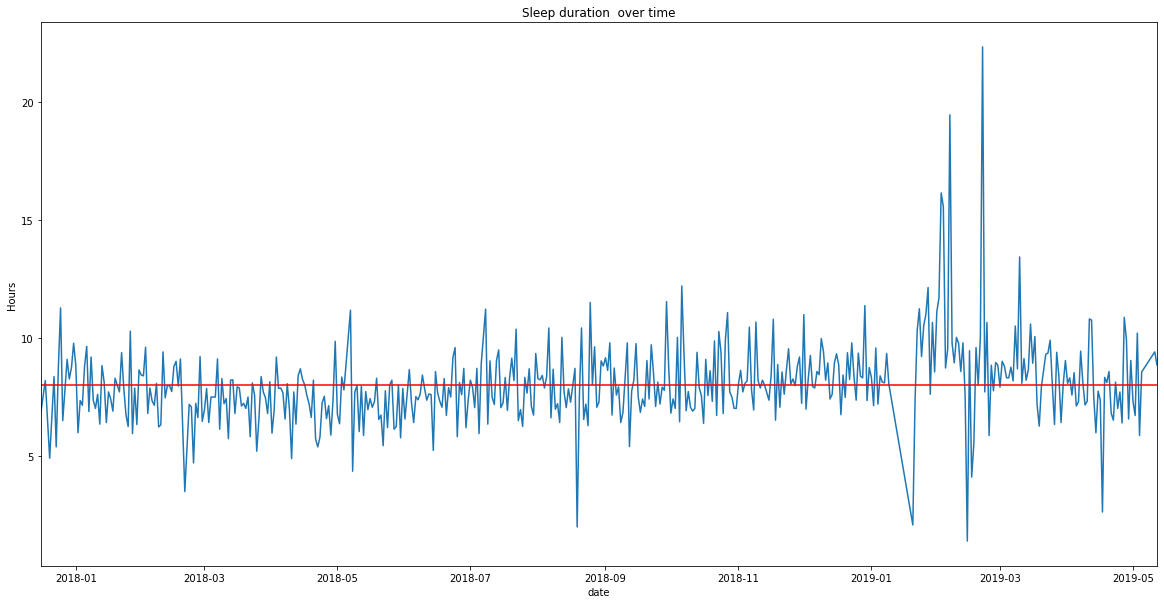

In [72]:
sleep['date'] = sleep['create_time'].dt.date
plt.figure(figsize = (20, 10))
sleep.groupby(['date'])['duration'].sum().plot(kind = 'line')
plt.title("Sleep duration  over time")
plt.ylabel("Hours")
plt.axhline(8, color = 'red')

Here we see that sleep mostly fluctuates around 8 hours in duration throughtout 2018. As 2019 starts, the variance of sleep durations briefly yet noticeably increases for about 3 months before returning to normal. 

In [73]:
sleep_data.head()

,Unnamed: 0,start_time,pkg_name,update_time,create_time,time_offset,datauuid,sleep_status,sleep_uuid,comment,json_version,deviceuuid
0,0,2018-11-26 03:07:00.000,com.sec.android.app.shealth,2018-11-26 11:36:33.269,2018-11-26 11:36:33.269,UTC-0400,041d210e-323d-3baa-7e2f-a60610198eb3,041d210e-323d-3baa-7e2f-a60610198eb3.sleep_sta...,a19c1a57-e5eb-de8d-ba6d-b163e38c8ba6,NaN,1,F/D7+hL5E5
1,1,2017-12-29 09:03:00.000,com.sec.android.app.shealth,2017-12-29 17:33:04.291,2017-12-29 17:33:04.291,UTC-0700,5b2adaf8-f852-5e37-1011-cb7bfd36fe85,5b2adaf8-f852-5e37-1011-cb7bfd36fe85.sleep_sta...,4f224a77-e1f5-8feb-f1ee-64352ff2fb54,NaN,1,F/D7+hL5E5
2,2,2018-08-15 02:40:00.000,com.sec.android.app.shealth,2018-08-15 10:36:24.250,2018-08-15 10:36:24.250,UTC-0300,4bb98155-fb12-4f3b-55d4-c17f239f743c,4bb98155-fb12-4f3b-55d4-c17f239f743c.sleep_sta...,3a95d014-e08a-eff8-ce9f-665ba7155e30,NaN,1,F/D7+hL5E5
3,3,2018-11-05 03:21:00.000,com.sec.android.app.shealth,2018-11-05 11:31:53.256,2018-11-05 11:31:53.256,UTC-0400,4c8d2731-7424-0fb3-58da-f1f849b2a2aa,4c8d2731-7424-0fb3-58da-f1f849b2a2aa.sleep_sta...,3eb5d8b0-848f-210a-f7e6-97556c667231,NaN,1,F/D7+hL5E5
4,4,2018-09-29 19:05:00.000,com.sec.android.app.shealth,2018-09-29 20:48:54.263,2018-09-29 20:48:54.263,UTC-0300,29f6ab41-ef0a-6ed2-3fdf-081de9dbb83f,29f6ab41-ef0a-6ed2-3fdf-081de9dbb83f.sleep_sta...,7022aa1f-28b0-2cb0-e388-f86050cbe105,NaN,1,F/D7+hL5E5


In [74]:
sleep_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652 entries, 0 to 651
Data columns (total 12 columns):
Unnamed: 0      652 non-null int64
start_time      652 non-null object
pkg_name        652 non-null object
update_time     652 non-null object
create_time     652 non-null object
time_offset     652 non-null object
datauuid        652 non-null object
sleep_status    652 non-null object
sleep_uuid      652 non-null object
comment         0 non-null float64
json_version    652 non-null int64
deviceuuid      652 non-null object
dtypes: float64(1), int64(2), object(9)
memory usage: 61.2+ KB


In [75]:
sleep_data.describe()

,Unnamed: 0,comment,json_version
count,652.00000,0.0,652.0
mean,325.50000,NaN,1.0
std,188.36047,NaN,0.0
min,0.00000,NaN,1.0
25%,162.75000,NaN,1.0
50%,325.50000,NaN,1.0
75%,488.25000,NaN,1.0
max,651.00000,NaN,1.0


In [76]:
#dropping all columns with no data/ no useful data
sleep_data = sleep_data.dropna(how = 'all', axis = 1) 
sleep_data = sleep_data.drop(columns = ['Unnamed: 0', 'datauuid', 'pkg_name', 'json_version', 'sleep_status', 'sleep_uuid'])

In [77]:
sleep_data.head()

,start_time,update_time,create_time,time_offset,deviceuuid
0,2018-11-26 03:07:00.000,2018-11-26 11:36:33.269,2018-11-26 11:36:33.269,UTC-0400,F/D7+hL5E5
1,2017-12-29 09:03:00.000,2017-12-29 17:33:04.291,2017-12-29 17:33:04.291,UTC-0700,F/D7+hL5E5
2,2018-08-15 02:40:00.000,2018-08-15 10:36:24.250,2018-08-15 10:36:24.250,UTC-0300,F/D7+hL5E5
3,2018-11-05 03:21:00.000,2018-11-05 11:31:53.256,2018-11-05 11:31:53.256,UTC-0400,F/D7+hL5E5
4,2018-09-29 19:05:00.000,2018-09-29 20:48:54.263,2018-09-29 20:48:54.263,UTC-0300,F/D7+hL5E5


### STEPS

This data file contains metrics involving the steps taken by this individual across time.

In [78]:
#getting preview of data
steps.head()

,Unnamed: 0,create_time,distance,time_offset,custom,count,end_time,speed,deviceuuid,start_time,pkg_name,update_time,datauuid,calorie,sample_position_type
0,0,2019-04-07 15:43:12.282,64.97,UTC-0300,NaN,102,2019-04-07 15:35:59.999,1.083333,F/D7+hL5E5,2019-04-07 15:35:00.000,com.sec.android.app.shealth,2019-04-07 15:43:12.282,4b14eb1c-62b6-cc49-f96a-1f628d13ebc4,4.14,230002.0
1,1,2019-04-07 17:33:31.553,17.36,UTC-0300,NaN,27,2019-04-07 17:16:59.999,1.194444,F/D7+hL5E5,2019-04-07 17:16:00.000,com.sec.android.app.shealth,2019-04-07 17:33:31.553,11662dbc-df54-d853-a4c1-5d2c5afa8daf,1.03,230002.0
2,2,2019-04-07 15:35:00.357,78.55,UTC-0300,NaN,102,2019-04-07 15:32:00.000,1.361111,jQfnryI8/B,2019-04-07 15:31:00.000,com.sec.android.app.shealth,2019-04-07 15:35:00.357,0d0d4f6b-af7f-4ab9-8e48-2b0d1164552d,4.08,NaN
3,3,2019-04-06 18:15:01.224,25.97,UTC-0300,NaN,36,2019-04-06 18:13:59.999,1.361111,F/D7+hL5E5,2019-04-06 18:13:00.000,com.sec.android.app.shealth,2019-04-06 18:15:01.224,dfb1ae81-f379-2111-bbb5-bf6d54cc2d88,1.50,230002.0
4,4,2019-04-07 15:07:14.262,75.75,UTC-0300,NaN,99,2019-04-07 15:05:00.000,1.305556,jQfnryI8/B,2019-04-07 15:04:00.000,com.sec.android.app.shealth,2019-04-07 15:07:14.262,0a029b80-8262-4b0e-bfe6-dfed62c83d6d,3.96,NaN


In [79]:
#exploring data types, null values, and number of entries and columns/features
steps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 15 columns):
Unnamed: 0              9093 non-null int64
create_time             9093 non-null object
distance                9093 non-null float64
time_offset             9093 non-null object
custom                  0 non-null float64
count                   9093 non-null int64
end_time                9093 non-null object
speed                   9093 non-null float64
deviceuuid              9093 non-null object
start_time              9093 non-null object
pkg_name                9093 non-null object
update_time             9093 non-null object
datauuid                9093 non-null object
calorie                 9093 non-null float64
sample_position_type    5124 non-null float64
dtypes: float64(5), int64(2), object(8)
memory usage: 1.0+ MB


In [80]:
#computing descriptive statistics for data
steps.describe()

,Unnamed: 0,distance,custom,count,speed,calorie,sample_position_type
count,9093.000000,9093.000000,0.0,9093.000000,9093.000000,9093.000000,5124.0
mean,4546.000000,42.854955,NaN,58.157154,1.451195,2.643093,230002.0
std,2625.067332,28.106006,NaN,36.372133,0.419114,2.047577,0.0
min,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,230002.0
25%,2273.000000,17.470000,NaN,24.000000,1.222222,1.000000,230002.0
50%,4546.000000,38.311000,NaN,53.000000,1.388889,2.250000,230002.0
75%,6819.000000,65.110000,NaN,94.000000,1.583333,3.910000,230002.0
max,9092.000000,168.340000,NaN,154.000000,6.527778,16.310000,230002.0


In [81]:
#dropping all columns with no data/ no useful data
steps = steps.dropna(how = 'all', axis = 1) 
steps = steps.drop(columns = ['Unnamed: 0', 'datauuid', 'pkg_name'])

In [82]:
steps.head()

,create_time,distance,time_offset,count,end_time,speed,deviceuuid,start_time,update_time,calorie,sample_position_type
0,2019-04-07 15:43:12.282,64.97,UTC-0300,102,2019-04-07 15:35:59.999,1.083333,F/D7+hL5E5,2019-04-07 15:35:00.000,2019-04-07 15:43:12.282,4.14,230002.0
1,2019-04-07 17:33:31.553,17.36,UTC-0300,27,2019-04-07 17:16:59.999,1.194444,F/D7+hL5E5,2019-04-07 17:16:00.000,2019-04-07 17:33:31.553,1.03,230002.0
2,2019-04-07 15:35:00.357,78.55,UTC-0300,102,2019-04-07 15:32:00.000,1.361111,jQfnryI8/B,2019-04-07 15:31:00.000,2019-04-07 15:35:00.357,4.08,NaN
3,2019-04-06 18:15:01.224,25.97,UTC-0300,36,2019-04-06 18:13:59.999,1.361111,F/D7+hL5E5,2019-04-06 18:13:00.000,2019-04-06 18:15:01.224,1.50,230002.0
4,2019-04-07 15:07:14.262,75.75,UTC-0300,99,2019-04-07 15:05:00.000,1.305556,jQfnryI8/B,2019-04-07 15:04:00.000,2019-04-07 15:07:14.262,3.96,NaN


In [83]:
#feature creation using date time columns/features
steps['create_time'] = pd.to_datetime(steps['create_time'])
steps['start_time'] = pd.to_datetime(steps['start_time'])
steps['end_time'] = pd.to_datetime(steps['end_time'])
steps['update_time'] = pd.to_datetime(steps['update_time'])

#this adjustment is necessary to make the step count data trend much the activity present in the sleep and exercise_data.
steps['start_time'] = steps.apply(lambda row: local_time(row['start_time'], row['time_offset']), axis=1)
steps['date'] = steps['create_time'].dt.date

In [84]:
#featyre creation using datetime columns/features
steps['hour'] = steps['start_time'].dt.hour
steps['weekday'] = pd.Categorical(steps['create_time'].dt.weekday_name, 
                                  categories = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'],
                                  ordered = True)
steps['day_label'] = ['weekend' if (x in weekend) else 'weekday' for x in steps['create_time'].dt.weekday_name ]

Question: Which days have the most steps taken?

Text(0, 0.5, 'Step Count')

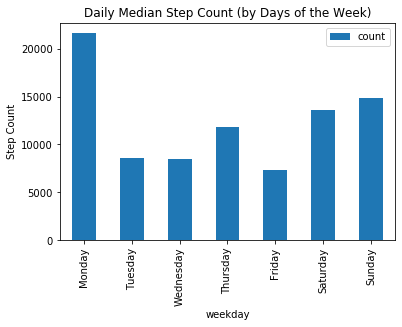

In [85]:
#plotting bar plot of steps per weekday
steps.groupby(['date', 'weekday'], as_index = False)['count'].sum().groupby('weekday').median().plot(kind = 'bar')
plt.title('Daily Median Step Count (by Days of the Week)')
plt.ylabel('Step Count')

From the plot above, we see that Wednesday has by far the most median steps taken, followed Monday, then by the weekend days. Thursday has the least among all days. Is there a significant change between weekdays and weekends?

Text(0, 0.5, 'Step Count')

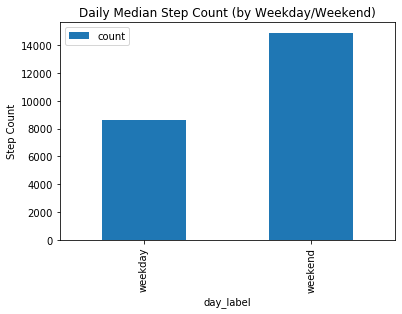

In [86]:
steps.groupby(['date', 'day_label'], as_index = False)['count'].sum().groupby('day_label').median().plot(kind = 'bar')
plt.title('Daily Median Step Count (by Weekday/Weekend)')
plt.ylabel('Step Count')

The median steps taken for all weekends is significantly greated that the steps taken during the weekdays. In fact it's about 1.5 times greater.

Now, let's check at the different times of day

In [87]:
pv2 = steps.groupby(['date', 'day_label', 'hour'], as_index = False)['count'].sum()
pv2 = pd.pivot_table(pv2, index = ['hour'], columns = ['day_label'], values = ['count'], aggfunc = np.median, fill_value = 0)
pv2

count        
day_label weekday weekend
hour                     
0           349.5   123.0
1            61.0    17.0
2            42.0    23.0
3            15.5    32.5
4            21.5    20.0
5            15.0     0.0
6            31.5     0.0
7            44.0    69.0
8           143.0   100.0
9           176.0   244.0
10          101.0   686.0
11          106.0  1423.0
12          199.0  1431.0
13          183.0   360.0
14          141.0   614.0
15          410.0  1959.0
16          176.0  2169.5
17          244.0   786.0
18          351.0  3358.0
19         1112.0   567.0
20          618.0   150.0
21          445.0   232.0
22          198.5   167.0
23          119.0   226.5

Text(0.5, 1.0, 'Step Count at Hours of the Day')

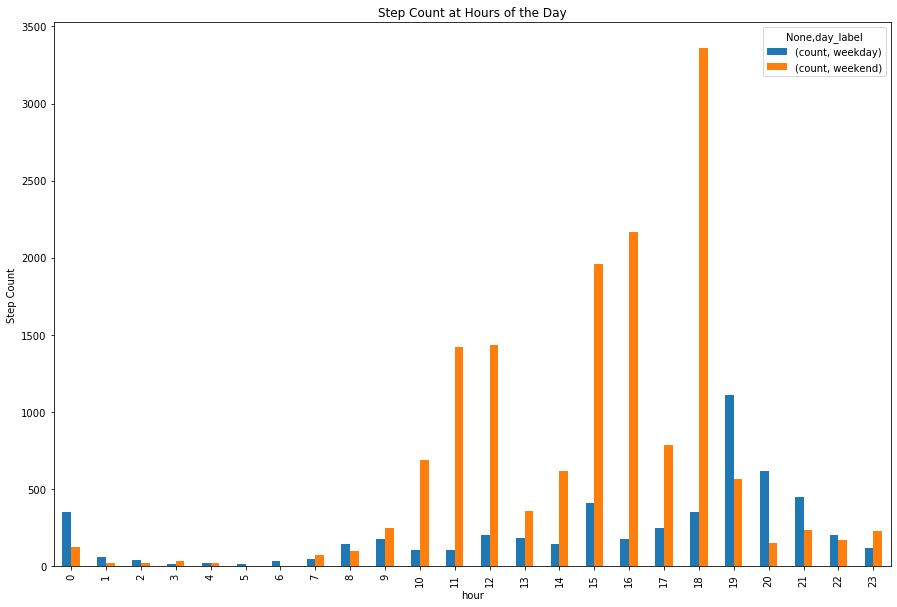

In [88]:
#plotting bar plot of step count per time day and for weekday/weekend
steps.groupby(['date', 'day_label', 'hour'], as_index = False)['count'].sum().groupby(['hour', 'day_label']).median().unstack().plot(kind = 'bar', figsize = (15, 10))
plt.ylabel('Step Count')
plt.title("Step Count at Hours of the Day")

A huge spike in step count at 7-8 am. That's when the individual wakes up according to their sleep data. It seems for the next while they walk, probably to work. They do significantly more walking in the weekends during the noon-afternoon (10-12pm, 15-18pm) period.

What about the long-term trend?

Text(0.5, 0, 'Date')

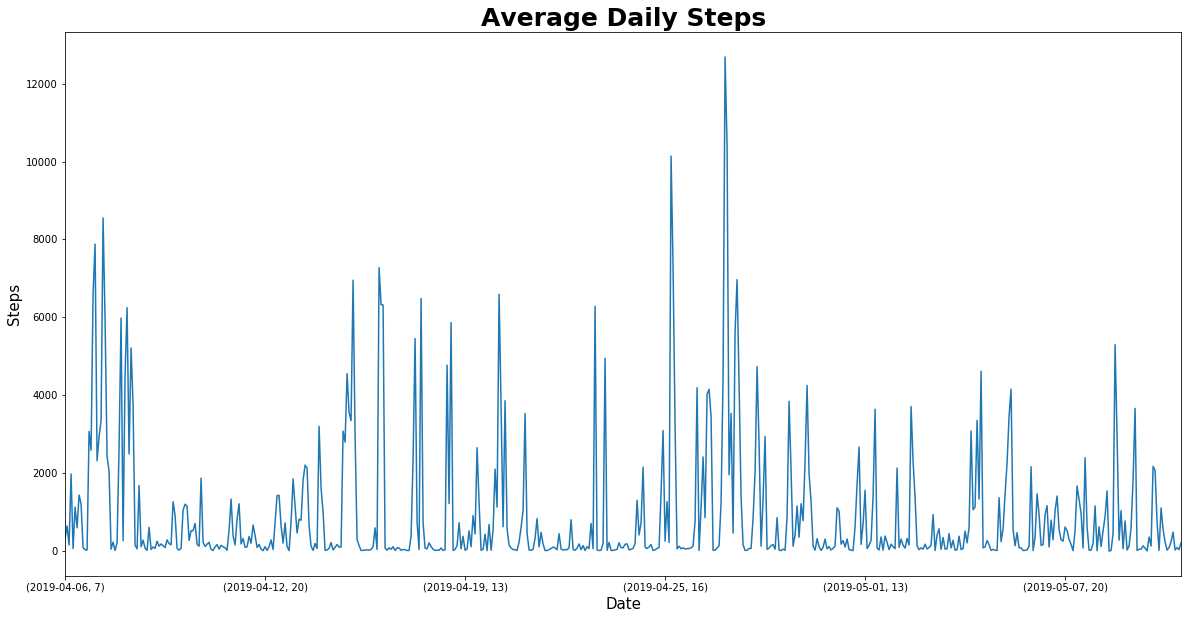

In [89]:
#plotting daily steps over time
plt.figure(figsize = (20, 10))
steps_plot = steps.groupby(['date', 'hour'])['count'].sum()
steps_plot.plot(kind = 'line')
plt.title("Average Daily Steps", fontsize = 25, fontweight = 'bold')
plt.ylabel("Steps", fontsize = 15)
plt.xlabel("Date", fontsize = 15)

There is no obvious trend in terms of the number of steps taken over time.

### STEPS DAILY

This data is a summary of daily steps over time.

In [90]:
#preview of data
step_daily.head()

,Unnamed: 0,create_time,distance,count,source_type,day_time,speed,deviceuuid,pkg_name,update_time,binning_data,datauuid,calorie,source_pkg_name
0,0,2019-05-10 11:52:40.347,2642.60,3341,0,1464048000000,6.944445,FN3Qt5ROM0,com.sec.android.app.shealth,2019-05-10 11:52:40.347,5792e74e-f564-4ef3-aa41-5f4779f4e0e2.binning_d...,5792e74e-f564-4ef3-aa41-5f4779f4e0e2,127.710000,com.sec.android.app.shealth
1,1,2019-05-10 11:52:40.348,824.48,1116,0,1464134400000,2.777777,FN3Qt5ROM0,com.sec.android.app.shealth,2019-05-10 11:52:40.348,6932b325-efa0-4b72-aa52-7d85fced693f.binning_d...,6932b325-efa0-4b72-aa52-7d85fced693f,37.680000,com.sec.android.app.shealth
2,2,2019-05-10 11:52:40.349,800.88,1057,0,1464220800000,3.611111,FN3Qt5ROM0,com.sec.android.app.shealth,2019-05-10 11:52:40.349,c5b4118f-c946-403c-a0f7-21736953b0d4.binning_d...,c5b4118f-c946-403c-a0f7-21736953b0d4,37.530000,com.sec.android.app.shealth
3,3,2019-05-10 11:52:40.350,4760.41,6411,0,1464307200000,4.000001,FN3Qt5ROM0,com.sec.android.app.shealth,2019-05-10 11:52:40.350,1c58a6ac-ba21-4901-b3db-43aababe2f78.binning_d...,1c58a6ac-ba21-4901-b3db-43aababe2f78,209.480000,com.sec.android.app.shealth
4,4,2019-05-10 11:52:40.351,1546.48,2034,0,1464393600000,2.692318,FN3Qt5ROM0,com.sec.android.app.shealth,2019-05-10 11:52:40.351,34411232-c5b6-4ae6-b812-cf46fba67a01.binning_d...,34411232-c5b6-4ae6-b812-cf46fba67a01,70.979996,com.sec.android.app.shealth


In [91]:
#descriptive statistics calclation
step_daily.describe()

,Unnamed: 0,distance,count,source_type,day_time,speed,calorie
count,2637.000000,2637.000000,2637.000000,2637.000000,2.637000e+03,2637.000000,2637.000000
mean,1318.000000,5271.935669,6891.371255,1.651877,1.515053e+12,2.606177,307.387237
std,761.380654,3387.197085,4462.131491,5.563553,2.667340e+10,1.355415,201.394529
min,0.000000,9.530000,12.000000,-2.000000,1.464048e+12,1.141383,0.500000
25%,659.000000,2518.700000,3352.000000,-2.000000,1.492474e+12,1.526758,147.879990
50%,1318.000000,5121.850000,6650.000000,0.000000,1.518480e+12,2.166667,296.600000
75%,1977.000000,7404.751000,9585.000000,0.000000,1.537488e+12,3.222222,425.819980
max,2636.000000,23989.287000,31896.000000,13.000000,1.557619e+12,6.944445,1520.679900


In [92]:
#dropping all columns with no data/ no useful data
step_daily = step_daily.dropna(how = 'all', axis = 1) 
step_daily = step_daily.drop(columns = ['Unnamed: 0', 'datauuid', 'pkg_name', 'source_pkg_name', 'binning_data'])

In [93]:
step_daily.head()

,create_time,distance,count,source_type,day_time,speed,deviceuuid,update_time,calorie
0,2019-05-10 11:52:40.347,2642.60,3341,0,1464048000000,6.944445,FN3Qt5ROM0,2019-05-10 11:52:40.347,127.710000
1,2019-05-10 11:52:40.348,824.48,1116,0,1464134400000,2.777777,FN3Qt5ROM0,2019-05-10 11:52:40.348,37.680000
2,2019-05-10 11:52:40.349,800.88,1057,0,1464220800000,3.611111,FN3Qt5ROM0,2019-05-10 11:52:40.349,37.530000
3,2019-05-10 11:52:40.350,4760.41,6411,0,1464307200000,4.000001,FN3Qt5ROM0,2019-05-10 11:52:40.350,209.480000
4,2019-05-10 11:52:40.351,1546.48,2034,0,1464393600000,2.692318,FN3Qt5ROM0,2019-05-10 11:52:40.351,70.979996


In [94]:
#feature creation using datetime features
step_daily['create_time'] = pd.to_datetime(step_daily['create_time'])
step_daily['day_time_utc'] = (step_daily['day_time']/1000).apply(datetime.utcfromtimestamp)
step_daily['weekday'] = pd.Categorical(step_daily['day_time_utc'].dt.weekday_name, 
                                  categories = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'],
                                  ordered = True)
step_daily['day_label'] = ['weekend' if (x in weekend) else 'weekday' for x in step_daily['weekday']]

Let's look at the step count by weekday as we did before to compare.

Text(0, 0.5, 'Step Count')

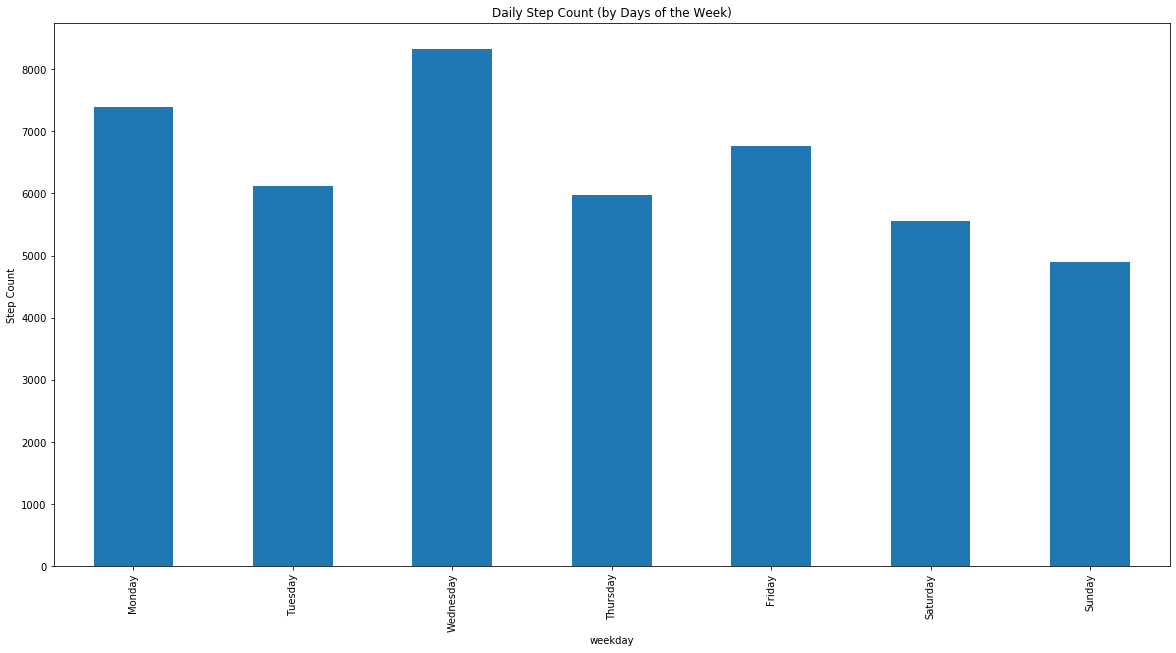

In [95]:
#plotting step counts for various weekdays
step_daily.groupby(['weekday'])['count'].median().plot(kind = 'bar', figsize = (20, 10))
plt.title('Daily Step Count (by Days of the Week)')
plt.ylabel('Step Count')

Very much similar to the previous with the highest steps on Wednesday, then Monday. However, the weekends here are significantly lower. Let's examine the long-term trend to see if it covers the same time span.

Text(0, 0.5, 'Step Count')

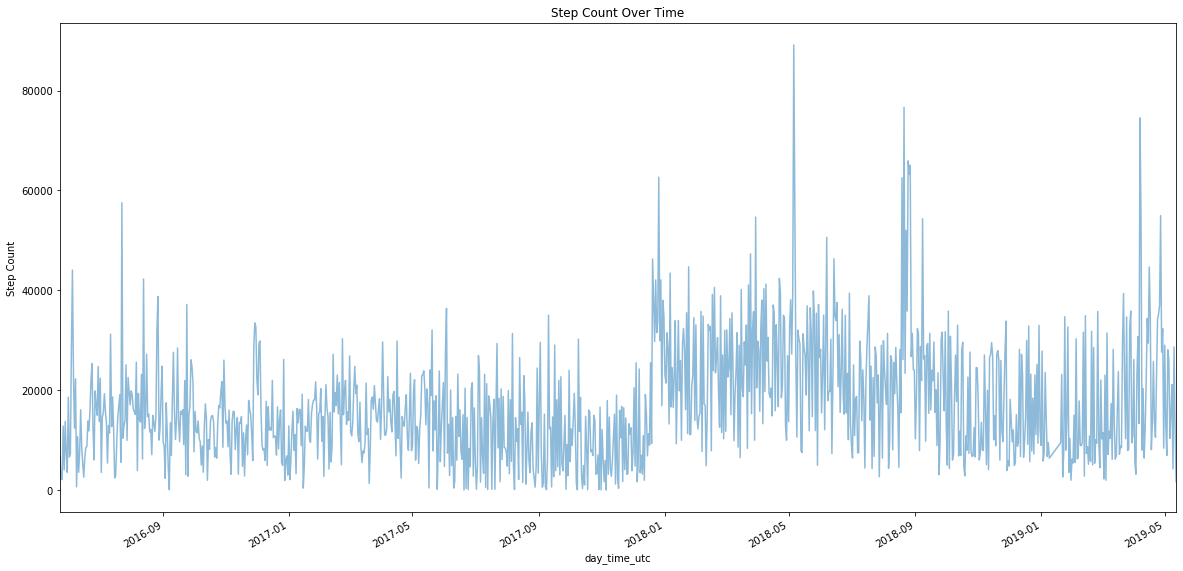

In [96]:
#plotting long term trend over time
step_daily.groupby(['day_time_utc'])['count'].sum().plot(kind = 'line', figsize = (20, 10), alpha = 0.50)
plt.title('Step Count Over Time')
plt.ylabel('Step Count')

We see yet again, a noticeable increase in activity on January 1, 2018. This dataset also gives some device data information. Let's overlay it to this plot and see what happens.

Text(0, 0.5, 'Step Count')

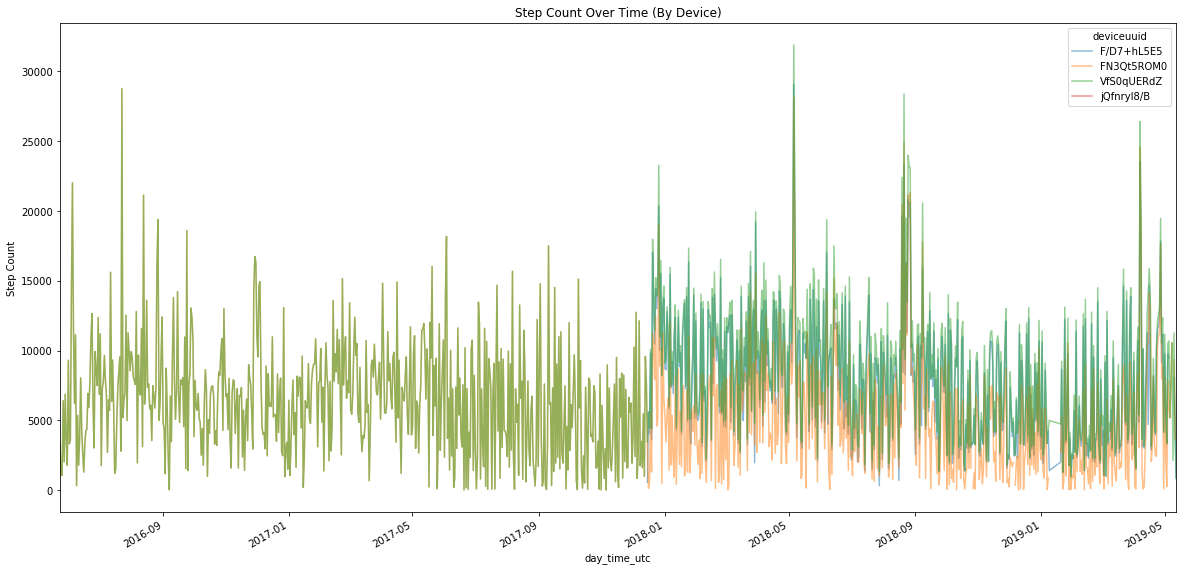

In [97]:
#reproducing above plot but adding device information
step_daily.groupby(['day_time_utc', 'deviceuuid'])['count'].sum().unstack().plot(kind = 'line', figsize = (20, 10), alpha = 0.50)
plt.title('Step Count Over Time (By Device)')
plt.ylabel('Step Count')

It appears like the individual owned 2 activity tracking devices (FN3Qt5RPM0 and Vf50qUERdZ) before January 2018. After that, another one comes online (F/D7+hL5E5). After that, the step count suddenly increased. This could be why the increase happened, the individual purchased a new device and got motivated to exercise more frequently or the individual could not keep track of his activity at all times and the device made it more easy to do so. The final device jQfnryI8/B has only one entry so it's difficult to visualize on the plot and doesn't add much information.

Let's see if when that device comes online.

In [98]:
# checking when the jQfnryI8/B device was used
step_daily[step_daily['deviceuuid'] == 'jQfnryI8/B' ]

,create_time,distance,count,source_type,day_time,speed,deviceuuid,update_time,calorie,day_time_utc,weekday,day_label
2631,2019-05-10 04:08:41.819,1653.8099,2132,0,1557360000000,2.722222,jQfnryI8/B,2019-05-10 13:34:37.115,78.96,2019-05-09,Thursday,weekday


The jQfnryI8/B device is fairly recent, and was used at the time spanned by the dataset. Now let's see what kind of devices they own.

In [99]:
# finding what type of devices the individual owns
step_daily.groupby('deviceuuid')['source_type'].value_counts()

deviceuuid  source_type
F/D7+hL5E5   13             500
FN3Qt5ROM0   0             1064
VfS0qUERdZ  -2             1072
jQfnryI8/B   0                1
Name: source_type, dtype: int64

The documentation tells us that type 0 corresponds to a phone, type -2 corresponds to an aggregated entry from all sources, type -1 is an app and type 1 is a galaxy watch.

This tells us that the individual owns two phone devices FN3Qt5ROM0 and jQfnryI8/B. The latter was acquired/used very recently in the timespan of the dataset. The VfS0qUERdZ device uuid is an aggregate entry and doesn't correspond to a specific device. However the last device F/D7+hL5E5 is indicated to be type 13 which doesn't exist in the documentation. This could be an entry error and it could actually correspond to type 1 (i.e a Galaxy Watch)) 

### STRESS

This data defines stress metrics for the individual.

In [100]:
#Preview of the data
stress.head()

,Unnamed: 0,create_time,time_offset,max,custom,end_time,deviceuuid,start_time,score,pkg_name,update_time,min,binning_data,datauuid,tag_id,comment,algorithm
0,0,2018-03-22 00:50:01.137,UTC-0300,NaN,7cb2f698-6e9e-48b0-a7fa-4ee889cfc5f9.custom.json,NaN,jQfnryI8/B,2018-03-22 00:49:55.970,31.000000,com.sec.android.app.shealth,2018-03-22 00:50:01.137,NaN,NaN,7cb2f698-6e9e-48b0-a7fa-4ee889cfc5f9,10002,NaN,NaN
1,1,2016-08-13 04:07:34.246,UTC-0600,NaN,NaN,NaN,jQfnryI8/B,2016-08-13 04:07:27.341,46.820553,com.sec.android.app.shealth,2016-08-13 04:07:34.246,NaN,NaN,f0541bdf-0627-47fa-93e8-0edfd62d238a,10002,NaN,NaN
2,2,2018-10-16 22:58:43.629,UTC-0300,56.0,adb8916f-2bfa-457a-a5a9-a141e3b2547c.custom.json,2018-10-16 22:58:38.737,jQfnryI8/B,2018-10-16 22:58:38.737,56.000000,com.sec.android.app.shealth,2018-10-16 22:58:43.629,56.0,NaN,adb8916f-2bfa-457a-a5a9-a141e3b2547c,10002,NaN,1.0
3,3,2019-01-02 23:22:54.750,UTC-0400,92.0,86a7f4c7-8266-4499-bac5-ddf0b6ed6168.custom.json,2019-01-02 23:22:34.279,jQfnryI8/B,2019-01-02 23:22:34.279,92.000000,com.sec.android.app.shealth,2019-01-02 23:22:54.750,92.0,NaN,86a7f4c7-8266-4499-bac5-ddf0b6ed6168,10009,NaN,1.0
4,4,2019-02-08 14:29:32.875,UTC-0400,23.0,8b95506d-3de2-4a94-a682-1fff6dd0b6e4.custom.json,2019-02-08 14:29:29.021,jQfnryI8/B,2019-02-08 14:29:29.021,23.000000,com.sec.android.app.shealth,2019-02-08 14:29:32.875,23.0,NaN,8b95506d-3de2-4a94-a682-1fff6dd0b6e4,10002,NaN,1.0


In [101]:
#exploring datatypes, NULL values, count of entries and columns/features
stress.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 17 columns):
Unnamed: 0      152 non-null int64
create_time     152 non-null object
time_offset     152 non-null object
max             87 non-null float64
custom          138 non-null object
end_time        87 non-null object
deviceuuid      152 non-null object
start_time      152 non-null object
score           152 non-null float64
pkg_name        152 non-null object
update_time     152 non-null object
min             87 non-null float64
binning_data    0 non-null float64
datauuid        152 non-null object
tag_id          152 non-null int64
comment         0 non-null float64
algorithm       87 non-null float64
dtypes: float64(6), int64(2), object(9)
memory usage: 20.3+ KB


In [102]:
#descriptive statistics
stress.describe()

,Unnamed: 0,max,score,min,binning_data,tag_id,comment,algorithm
count,152.000000,87.000000,152.000000,87.000000,0.0,152.000000,0.0,87.0
mean,75.500000,14.827586,29.516455,14.827586,NaN,10002.368421,NaN,1.0
std,44.022721,22.042879,26.172630,22.042879,NaN,1.467909,NaN,0.0
min,0.000000,0.000000,0.000000,0.000000,NaN,10002.000000,NaN,1.0
25%,37.750000,1.000000,3.000000,1.000000,NaN,10002.000000,NaN,1.0
50%,75.500000,5.000000,28.857207,5.000000,NaN,10002.000000,NaN,1.0
75%,113.250000,19.500000,49.064685,19.500000,NaN,10002.000000,NaN,1.0
max,151.000000,92.000000,92.000000,92.000000,NaN,10009.000000,NaN,1.0


In [103]:
#dropping all columns with no data/ no useful data
stress = stress.dropna(how = 'all', axis = 1) 
stress = stress.drop(columns = ['Unnamed: 0', 'custom', 'datauuid', 'pkg_name'])

In [104]:
#creating features using datetime features
stress['create_time'] = pd.to_datetime(stress['create_time'])
stress['date'] = stress['create_time'].dt.date
stress['hour'] = stress['create_time'].dt.hour
stress['weekday'] = pd.Categorical(stress['create_time'].dt.weekday_name, 
                                  categories = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'],
                                  ordered = True)
stress['day_label'] = ['weekend' if (x in weekend) else 'weekday' for x in stress['weekday']]

In [105]:
stress['deviceuuid'].unique()

array(['jQfnryI8/B'], dtype=object)

Question, what are the distribution of stress scores?

Text(0.5, 1.0, 'Stress Score Distribution')

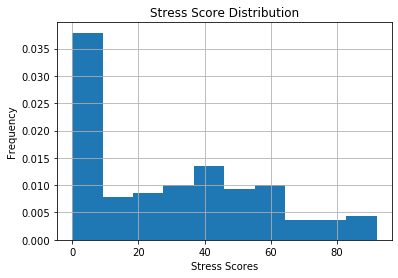

In [106]:
#plotting histogram of stress scores
stress['score'].hist(density = True)
plt.xlabel('Stress Scores')
plt.ylabel('Frequency')
plt.title('Stress Score Distribution')

Most entries have a low stress score. The stress scores have another peak at 40 and have some entries as high as 80

Text(0.5, 1.0, 'Boxplot of Stress Scores (by Weekday)')

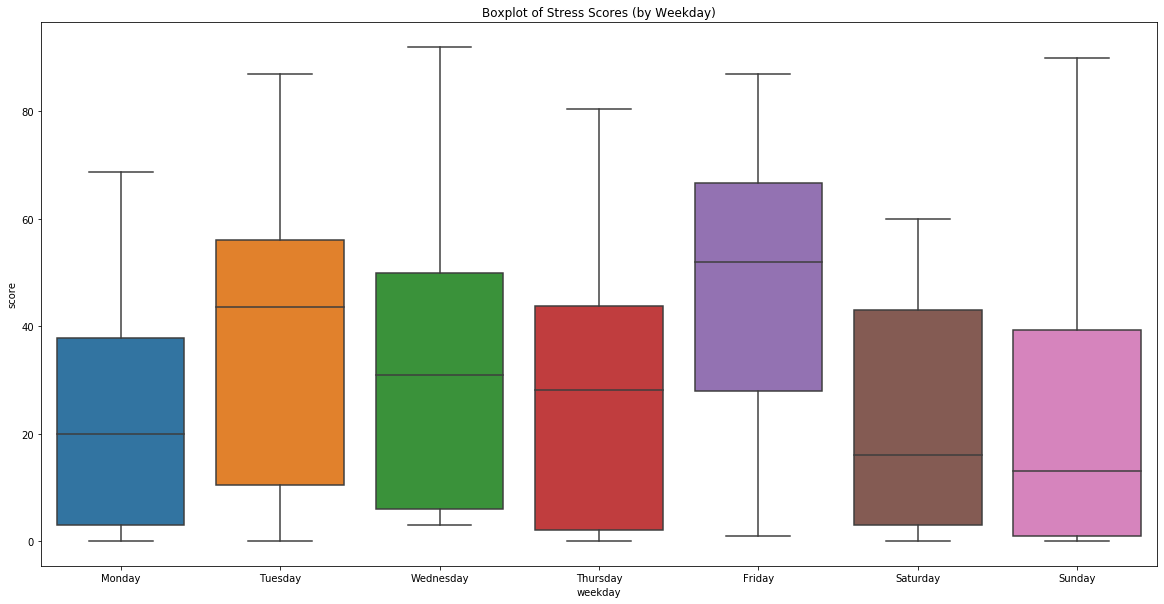

In [107]:
# generating barplot of stress scores by weekday
fig = plt.figure(figsize = (20, 10))
sns.boxplot(data = stress, x = 'weekday', y= 'score')
plt.title('Boxplot of Stress Scores (by Weekday)')

The weekends have the lowest median stress score out of all days. This could be expected as the weekends is generally when people relax. Saturday also has the least stress score spread compared to the rest of the weekdays. Friday has the highest median stress score. This could be increased stress in anticipation of the weekend. After the weekend, Monday has the lowest median stress score after the weekend's rest but there is an increase probably due to increased responsiblities of work. Tuesday, Wednesday and Sunday have the greatest spread in their stress scores. Tuesday and Wednesday could represent the height of work-stress as their are mid-week and Sunday could have increased stress levels for the week ahead.

Now let's do the same analysis but over the different hours of the day

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000023E7DFF4C18>,
      dtype=object)

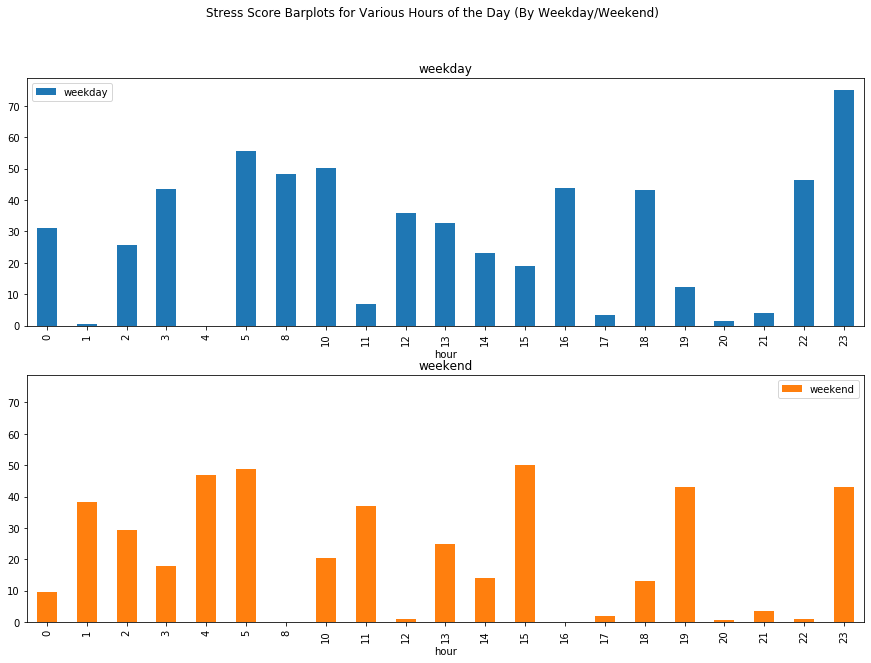

In [108]:
# plotting stress score boxplots for the hours of the day and for weekday/weekends
stress.groupby(['hour', 'day_label'])['score'].median().unstack().plot(kind = 'bar', subplots = True, sharex = False, figsize = (15, 10), sharey = True,
                                                                       title = 'Stress Score Barplots for Various Hours of the Day (By Weekday/Weekend)')

The plot above displays a bar chart of stress scores for weekdays and weekends by the hour of the day. The individual has higher stress scores in the 8am-2pm time window. This corresponds to the interval the individual is working. 

The highest stress score on the weekdays occurs at 11pm, a few hours away from sleep, probably in anticipation of the work day head the next day. 

The stress score briefly drops at 11 am on weekdays and 12 pm on weekends. These could correspond to lunch times of the individual.

Let's look more closely at weekdays vs weekends.

Text(0.5, 1.0, 'Stress Scores for Weekday vs Weekends')

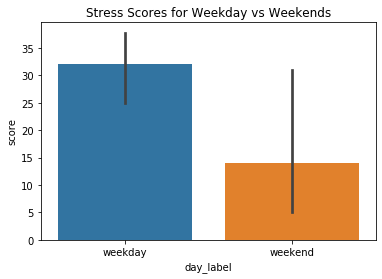

In [109]:
# plotting weekday vs weekends bar plot of stress scores
sns.barplot(data = stress, x = 'day_label', y= 'score', estimator = np.median)
plt.title('Stress Scores for Weekday vs Weekends')

Weekdays tend to have higher median stress scores. However, weekends tend to have more spread in the values of the stress score.

Finally, as before, looking at the long-term trend.

Text(0, 0.5, 'Stress Scores')

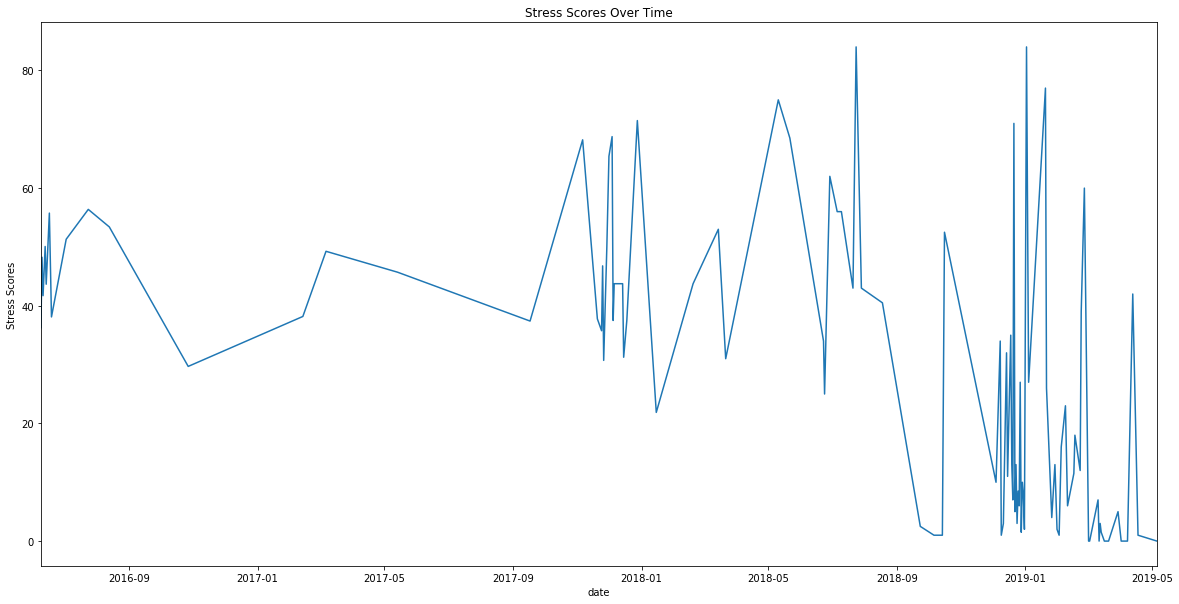

In [110]:
#plotting long-term trend of stress scores.
stress.groupby(['date'])['score'].median().plot(kind = 'line', figsize = (20, 10))
plt.title('Stress Scores Over Time')
plt.ylabel('Stress Scores')

There were few stress score measurements initially but gradually increase approaching January 2018. After that date, the stress scores has been on a downwards trend, however there is lots of volatility in that score.

### Combined

Combining the datasets to examine correlations

In [111]:
# extracting relevant columns
sleep2 = sleep[['date', 'duration', 'efficiency']]
exercise2 = exercise[['date', 'duration']]
calories2 = calories[['date', 'active_calorie', 'rest_calorie']]
stress2 = stress[['date', 'score']]
steps2 = steps[['date', 'count']]
heart_rate2 = heart_rate[['date', 'heart_rate']]

In [112]:
# grouping by 'date' column to provide a key to merge on
sleep2 = sleep2.groupby('date', as_index = False).sum()
exercise2 = exercise2.groupby('date', as_index = False).sum()
calories2 = calories2.groupby('date', as_index = False).median()
stress2 = stress2.groupby('date', as_index = False).median()
steps2 = steps2.groupby('date', as_index = False).sum()
heart_rate2 = heart_rate2.groupby('date', as_index = False).median()

In [113]:
#creating a list of dataframes.
df_list = [sleep2, exercise2, calories2, stress2, steps2, heart_rate2]

In [114]:
#applying the reduce function in combination with merge to merge all the dataframes at once. Using outer join to retain
#unique indicies of all dataframes.
df_final = reduce(lambda left,right: pd.merge(left, right,on='date', how = 'outer'), df_list)

In [115]:
#casting date column to datetime format
df_final['date'] = pd.to_datetime(df_final['date'])

In [116]:
#creating features using datetime columns
df_final['weekday'] = df_final['date'].dt.weekday_name
df_final['day_label'] = ['weekend' if (x in weekend) else 'weekday' for x in df_final['date'].dt.weekday_name]

In [117]:
# renaming a few columns for easy-read
df_final = df_final.rename({'duration_x': 'sleep_duration', 'duration_y': 'exercise_duration', 'efficiency': 'sleep_efficiency',
                            'score': 'stress_score', 'count': 'step_count'}, axis = 1)

Let's explore the correlation heatmap

Text(0.5, 1, 'HeatMap of Correlations for Combined Variables')

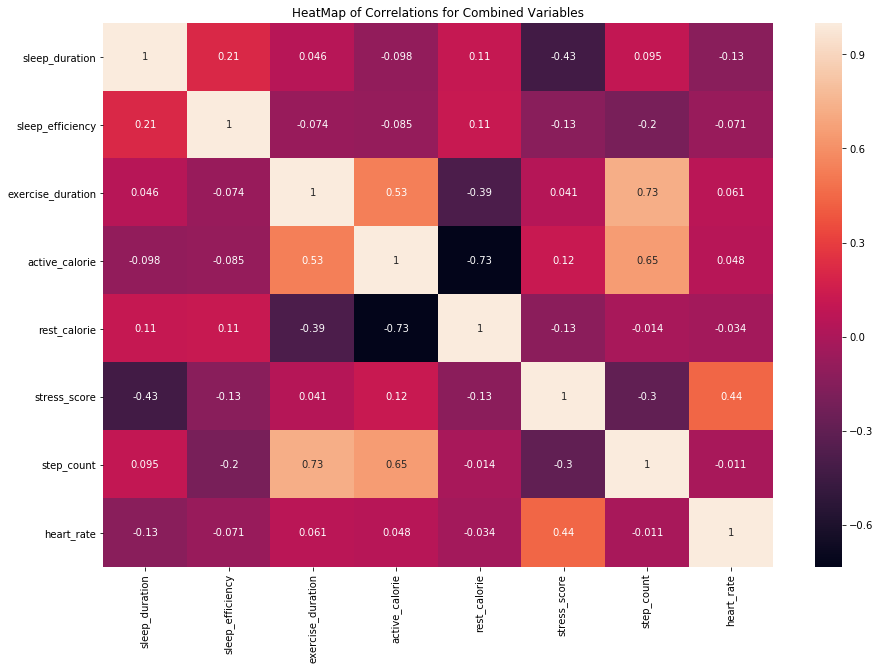

In [118]:
#plotting correlation matrix heatmap
plt.figure(figsize = (15,10))
sns.heatmap(df_final.corr(), annot = True)
plt.title('HeatMap of Correlations for Combined Variables')

D:\Anaconda\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
D:\Anaconda\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 1, 'Combined Dataset Variables')

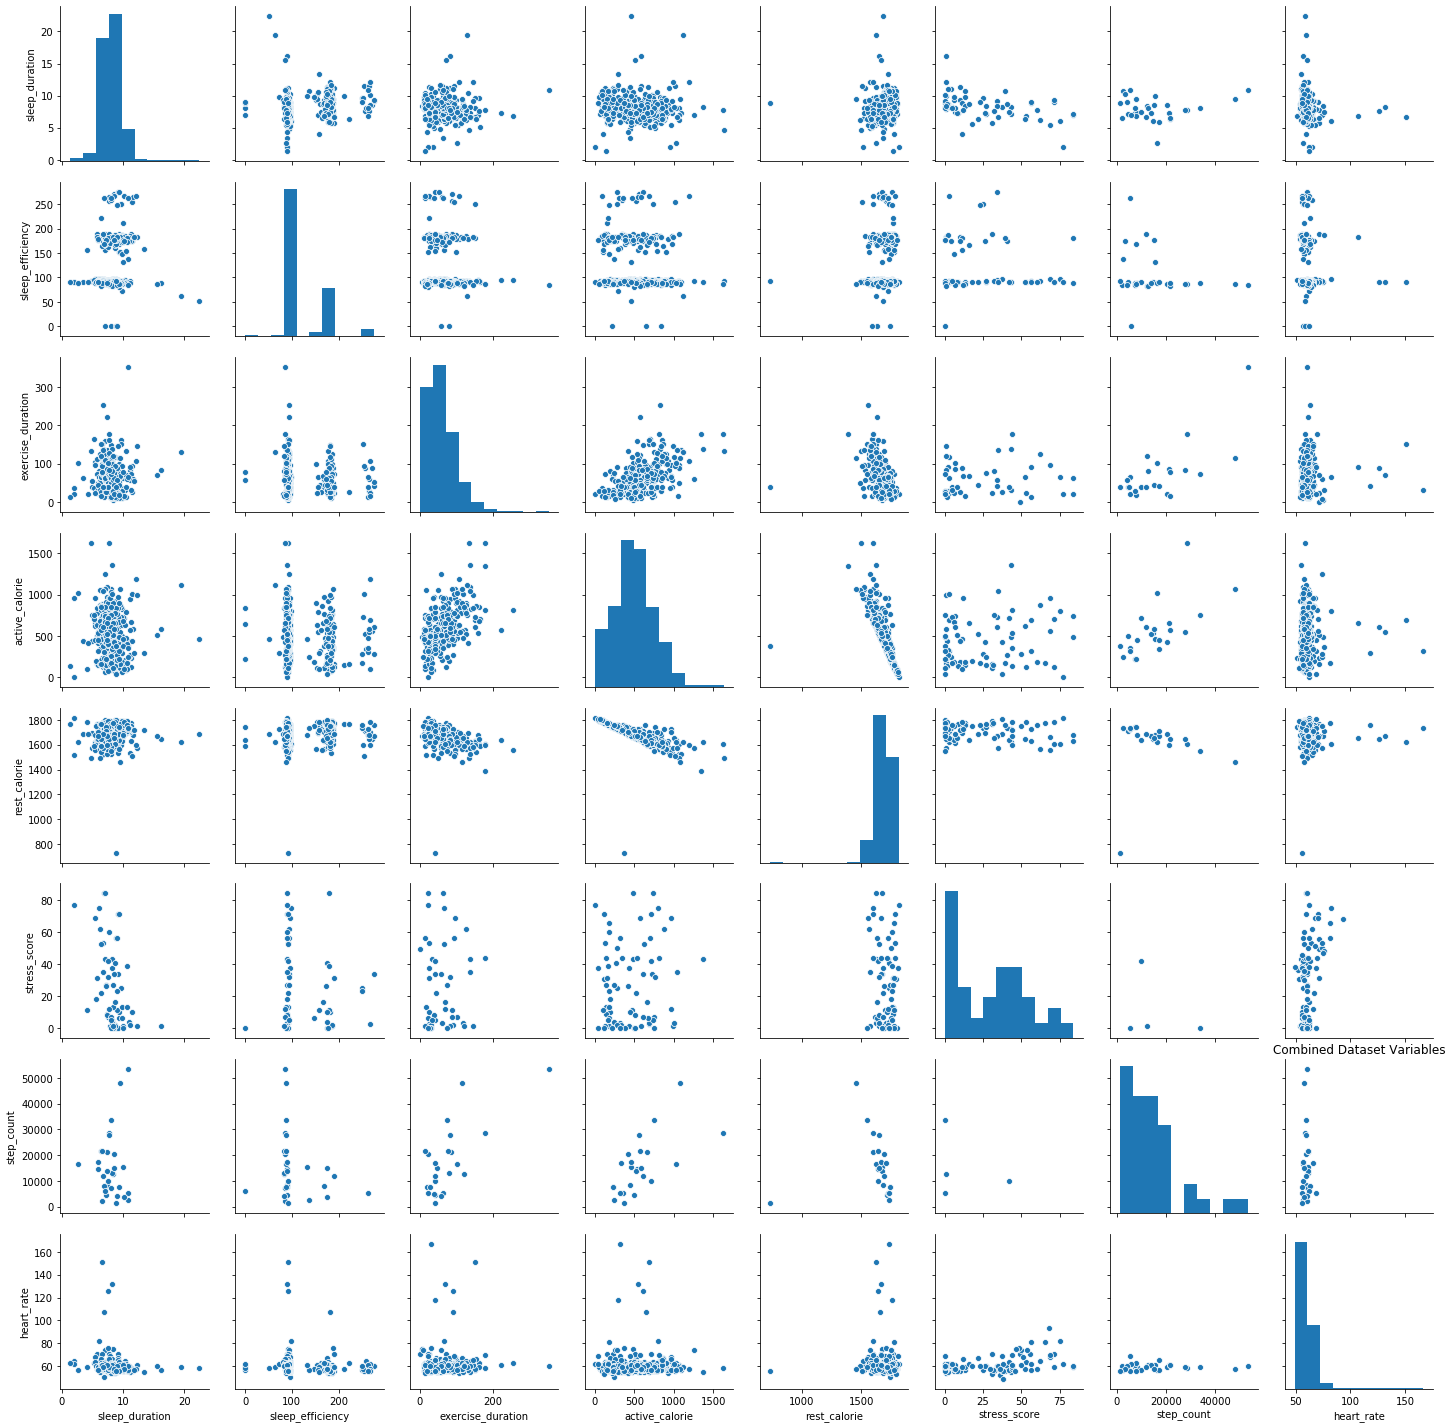

In [119]:
#creating scatterplots for each pair of variables in combined dataset
sns.pairplot(df_final)
plt.title('Combined Dataset Variables')

The highest correlation among datasets is between rest and active calories with a correlation score of -0.73. This indicates that as the resting calories increase/decrease, the active calories decrease/increase respectively. 

The next highest correlation is between active calories and exercise duration. This one is expected since the more the exercise done, the more calories burnt during exercise. The correlation score is +0.53. On the other hand, we have a -0.39 correlation between rest calorie and exercise duration because of the -0.73 correlation between rest and active calories

Next, we have a +0.5 correlation score between step_count and active calorie, as well as a +0.49 correlation score between step_count and exercise_duration. This makes sense since steps are under the "walking" exercise type catgeory and are also included under brisk walking and running so they contribute to the exercise duration which in turn contributes the calories burnt.

There is a +0.44 correlation score between heart_rate and stress_score which tells us that the stress_score is partly calculated/measured with respect to the heart rate.

Sleep duration has a -0.43 correlation with stress score, showing that a good night sleep is important in managing stress.

Finally a -0.35 correlation between sleep efficiency and step count. This is a bit strange as it means that the more steps taken by the individual, the less their sleep efficiency and vice versa. Surprisingly, we don't see a similar correlation with exercise duration so we can rule out that this is due to exhaustion/soreness from intense activity.

### Conclusions

What we could summarize about this individual is that they have a relatively atheltic lifestyle, performing a variety of exercises during the week such as walking, brisk walking, running, elliptical, swimming, hiking and circuit training. Walking is their most common activity while "custom activities" and swimming are also preferred. They are active more weekdays that weekends. Hiking and elliptical work are done when they are on their travels.

In addition, they travel three times a year, approximately every four months (April, August and December). They travel across three regions across 5 timezones due to the daylight savings time shifts. The first region, their home place, is UTC-0300/UTC-0400. The second region has a 3 hour difference at UTC-600/UT-0700. This region is where they travel in April and November respectively. Finally the UTC+0300 region is where they travel in August.

They own three devices that measure their health metrics for sleep, exercise, step-count, floors and heart-rate. This shows a general care and awareness of the state of their health. They have become increasingly more active following January of 2018 when they purchased. The devices consist of two phones and a potential Samsung Galaxy watch. After obtaining this galaxy watch, the individual's activity increased. There were more data entries for activities and they exercised more. One of the phones is used to measure their entire stress observations.

Regarding their stress, that was a metric that was on the decline after January 2018, following them obtaining a Galaxy watch, using it to track their exercise and in turn increasing their exercise duration. They are most stressed on Fridays and Tuesdays and least stressed on weekends. In terms of hours of the day, their stress score decline around lunch time and increases right before bed time. The latter is probably due to exhaustion at the end of the day and anticipation of the next work day. 

They usually get 7-8 hours of sleep on average which is in the recommended range. They usually head to bed between 9pm to 2 am and wake up around 6-8 am. They sleep more on weekends than weekdays.

Their step count usually rises right after their sleep period and before work, indicating a possibility that this could be their means of travel to and from their work place.

They spend most of their time on the first and second floors indicating that they could possibly live in a two-storey apartment/house/home. 

From the calorie data, we can see that they have a basal metabolic rate of ~1690 kcal/day as well as an active rate ~470 kcal/day. From the basal metabolic rate and the equations provided by research (link provided within analysis), we can get a rough estimate of their weight to be ~70kg. 

From the heart_rate data we observate that they have a maximum heart rate of 180 bpm with typical ranges between 60-100. This confirms their active lifestyle and based on research (link provided within analysis), we can esimate their age around 30-35 year old.